# Import Required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly as pt
import pylab

## Load data and show Overview

In [2]:
data=pd.read_csv("F:\\AI Content\\datasets\\House price prediction\\train.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
copy=data.copy()
copy.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
copy.shape

(1460, 81)

In [6]:
copy.drop(['Id'],axis=1,inplace=True)

In [7]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
copy.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

## Split numerical,categorical and datetime features

In [9]:
categorical_features=[i for i in copy.columns if copy[i].dtype=="O"]

In [10]:
year_features=[i for i in copy.columns if 'Yr' in i or 'Year' in i]

In [11]:
numerical_features=[i for i in copy.columns if copy[i].dtype!='O' and i not in year_features]

In [12]:
print("Total Categorical features:",len(categorical_features))
print("Total Numerical Features:",len(numerical_features))
print('Total Year Features:',len(year_features))

Total Categorical features: 43
Total Numerical Features: 33
Total Year Features: 4


## What percent of Missing values are in features

In [13]:
cat_nan=[i for i in categorical_features if copy[i].isnull().sum()>=1]
print("Number of categorical features having NaN:",len(cat_nan),'\n')
for i in cat_nan:
    print(i,'has',round(copy[i].isnull().sum()*100/len(copy[i]),2),"%  of Null values")

Number of categorical features having NaN: 16 

Alley has 93.77 %  of Null values
MasVnrType has 0.55 %  of Null values
BsmtQual has 2.53 %  of Null values
BsmtCond has 2.53 %  of Null values
BsmtExposure has 2.6 %  of Null values
BsmtFinType1 has 2.53 %  of Null values
BsmtFinType2 has 2.6 %  of Null values
Electrical has 0.07 %  of Null values
FireplaceQu has 47.26 %  of Null values
GarageType has 5.55 %  of Null values
GarageFinish has 5.55 %  of Null values
GarageQual has 5.55 %  of Null values
GarageCond has 5.55 %  of Null values
PoolQC has 99.52 %  of Null values
Fence has 80.75 %  of Null values
MiscFeature has 96.3 %  of Null values


In [14]:
num_nan=[i for i in numerical_features if copy[i].isnull().sum()>=1]
print("Number of numeric features having NaN:",len(num_nan),'\n')
for i in num_nan:
    print(i,'has',round(copy[i].isnull().sum()*100/len(copy[i]),2),"%  of Null values")

Number of numeric features having NaN: 2 

LotFrontage has 17.74 %  of Null values
MasVnrArea has 0.55 %  of Null values


In [15]:
year_nan=[i for i in year_features if copy[i].isnull().sum()>=1]
print('Number Year features having NaN:',len(year_nan),'\n')
for i in year_nan:
    print(i,'has',round(copy[i].isnull().sum()*100/len(copy[i]),2),"%  of Null values")


Number Year features having NaN: 1 

GarageYrBlt has 5.55 %  of Null values


## Analyze Relation between SalePrice, data missing and data not missing

In this section i will create new features from thoes features where data is Missing, in our new features there will be only two Labels "Missing" and "Not Missing". this will help us to understand how important is Missing values with respect to SalePrice.

In [16]:
for i in year_nan: # creating new features from Year Missing features
    copy[i+'_nan']=np.where(copy[i].isnull(),"Missing",'Not Missing')

In [17]:
for i in cat_nan: # creating new features from categorical Missing features
    copy[i+'_nan']=np.where(copy[i].isnull(),"Missing",'Not Missing')

In [18]:
for i in num_nan: # creating new features from numerical Missing features
    copy[i+'_nan']=np.where(copy[i].isnull(),'Missing','Not Missing')

### Relation between missing,not missing and Saleprice

In [19]:
missing=[i for i in copy.columns if 'nan' in i] # list of new features

In [20]:
copy[missing].head()

GarageYrBlt_nan Alley_nan MasVnrType_nan BsmtQual_nan BsmtCond_nan  \
0     Not Missing   Missing    Not Missing  Not Missing  Not Missing   
1     Not Missing   Missing    Not Missing  Not Missing  Not Missing   
2     Not Missing   Missing    Not Missing  Not Missing  Not Missing   
3     Not Missing   Missing    Not Missing  Not Missing  Not Missing   
4     Not Missing   Missing    Not Missing  Not Missing  Not Missing   

  BsmtExposure_nan BsmtFinType1_nan BsmtFinType2_nan Electrical_nan  \
0      Not Missing      Not Missing      Not Missing    Not Missing   
1      Not Missing      Not Missing      Not Missing    Not Missing   
2      Not Missing      Not Missing      Not Missing    Not Missing   
3      Not Missing      Not Missing      Not Missing    Not Missing   
4      Not Missing      Not Missing      Not Missing    Not Missing   

  FireplaceQu_nan GarageType_nan GarageFinish_nan GarageQual_nan  \
0         Missing    Not Missing      Not Missing    Not Missing   
1     Not Missing    Not Missing      Not Missing    Not Missing   
2     Not Missing    Not Missing      Not Missing    Not Missing   
3     Not Missing    Not Missing      Not Missing    Not Missing   
4     Not Missing    Not Missing      Not Missing    Not Missing   

  GarageCond_nan PoolQC_nan Fence_nan MiscFeature_nan LotFrontage_nan  \
0    Not Missing    Missing   Missing         Missing     Not Missing   
1    Not Missing    Missing   Missing         Missing     Not Missing   
2    Not Missing    Missing   Missing         Missing     Not Missing   
3    Not Missing    Missing   Missing         Missing     Not Missing   
4    Not Missing    Missing   Missing         Missing     Not Missing   

  MasVnrArea_nan  
0    Not Missing  
1    Not Missing  
2    Not Missing  
3    Not Missing  
4    Not Missing

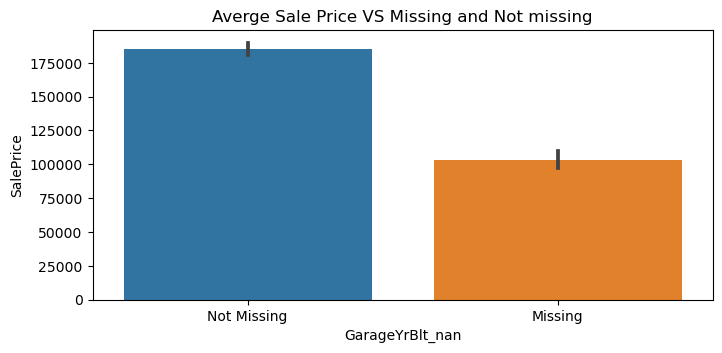

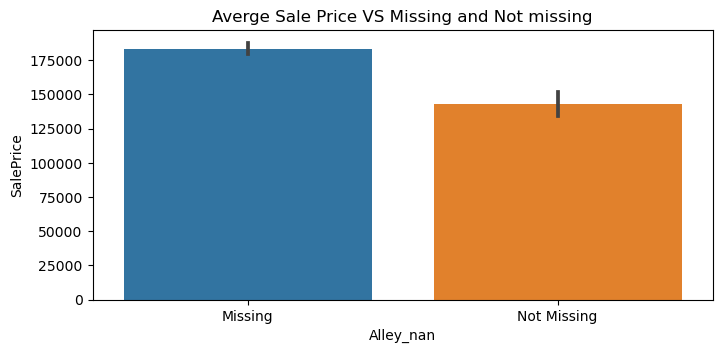

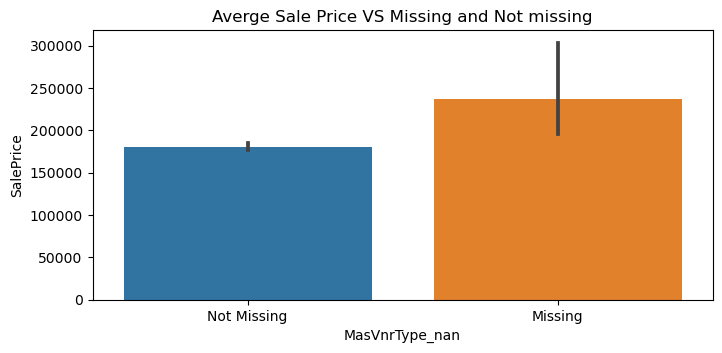

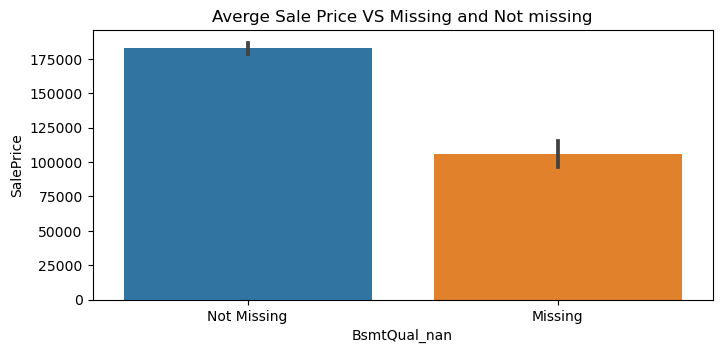

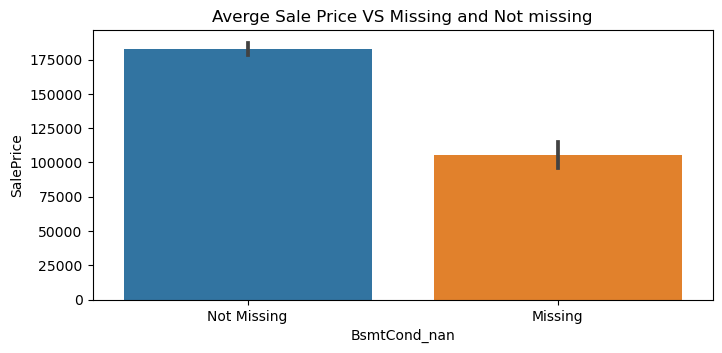

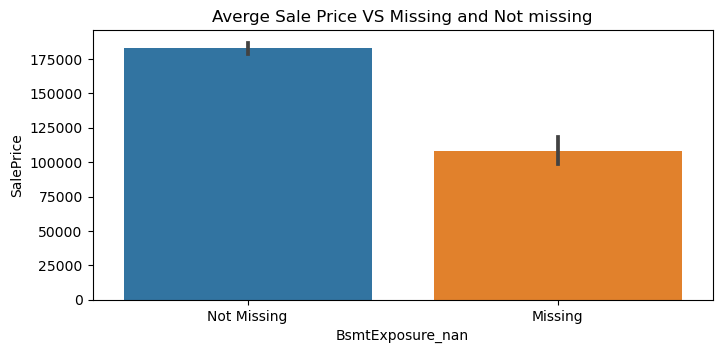

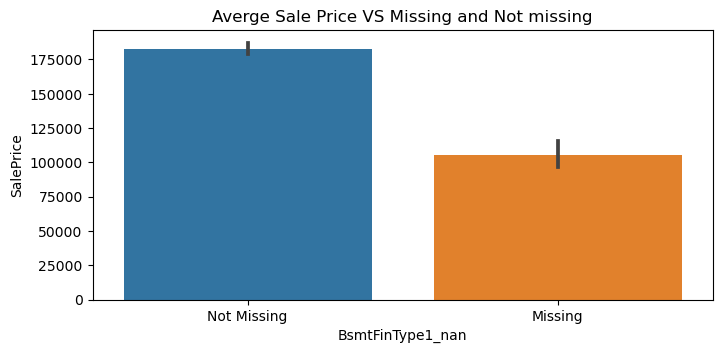

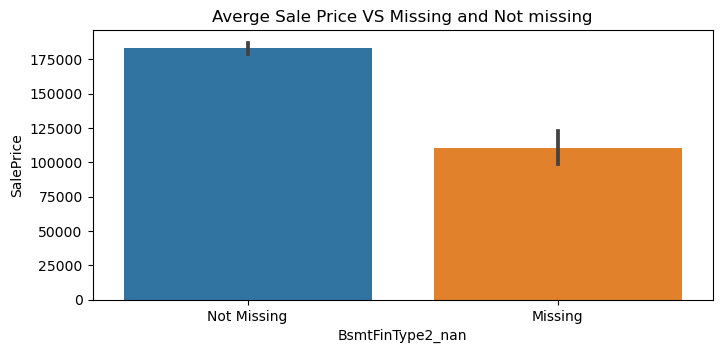

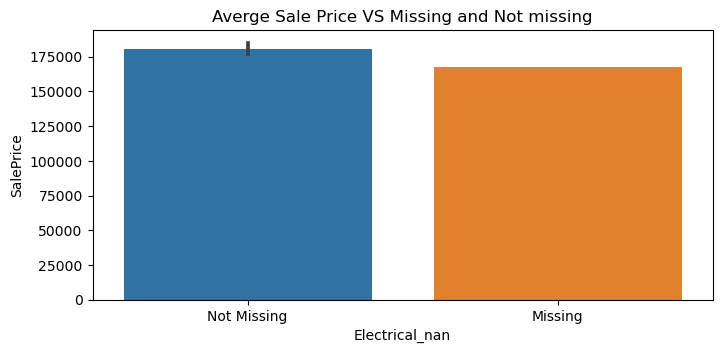

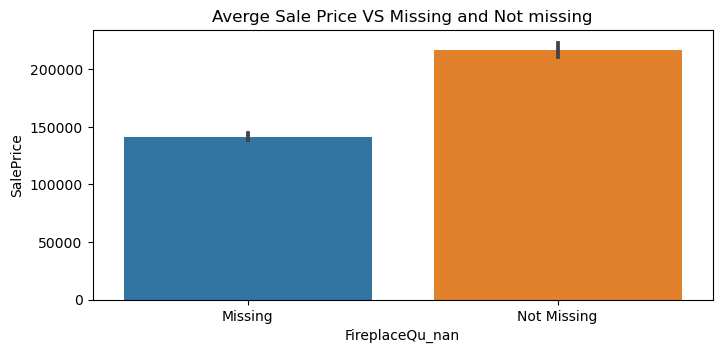

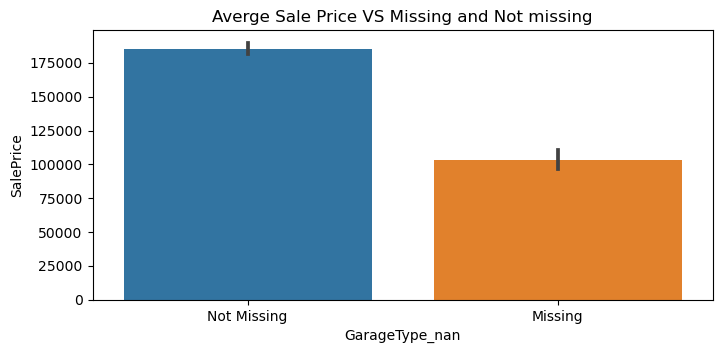

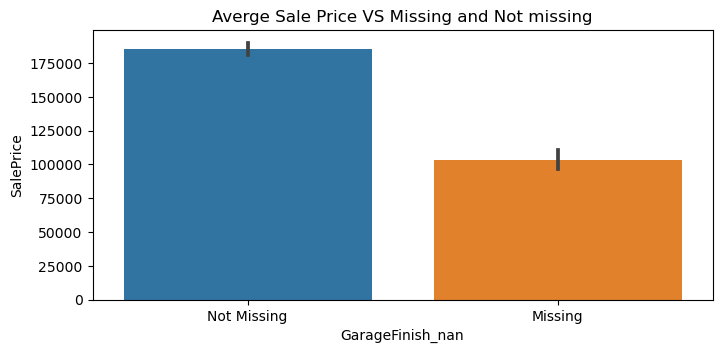

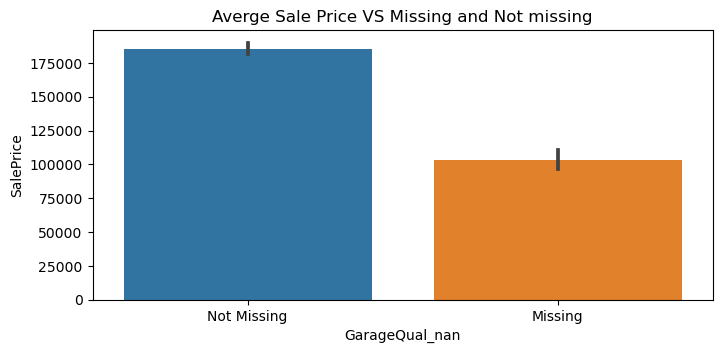

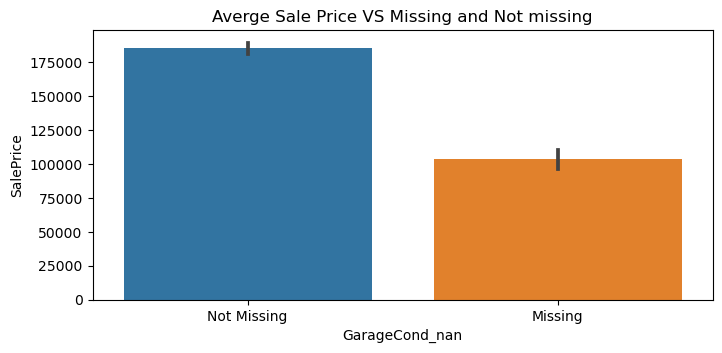

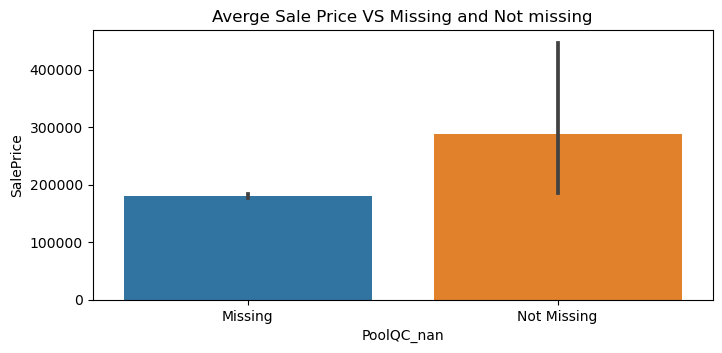

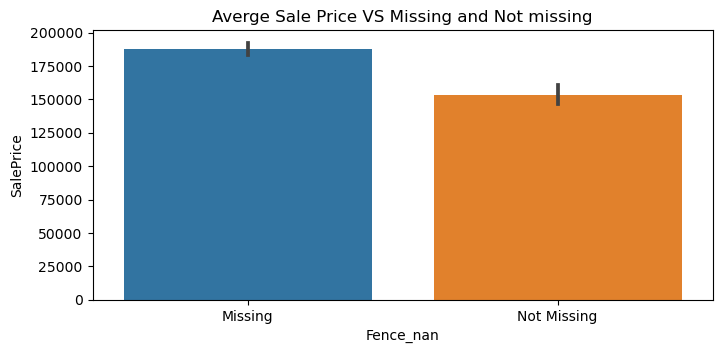

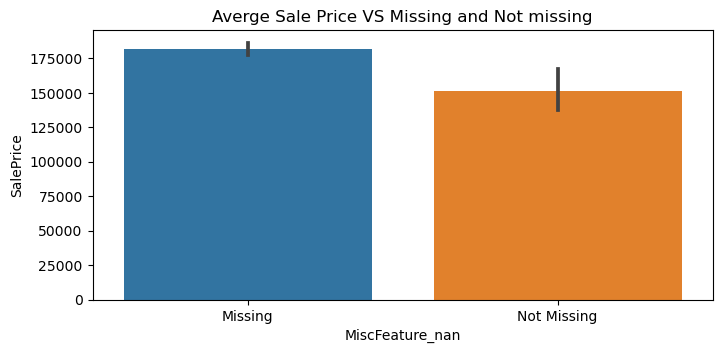

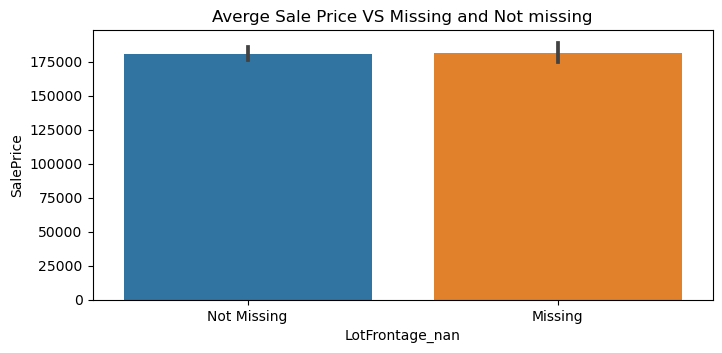

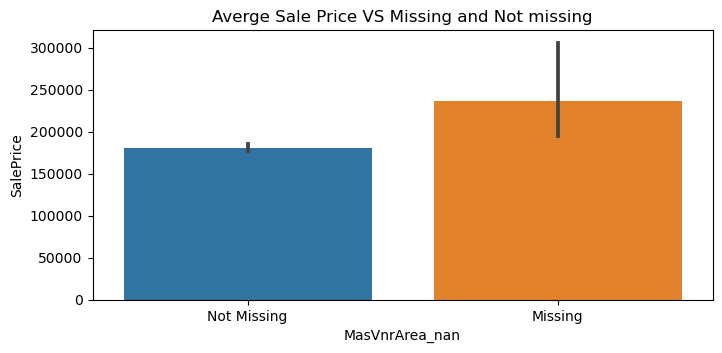

In [21]:
for i in missing:
    plt.figure(figsize=(8,3.5))
    plt.title("Averge Sale Price VS Missing and Not missing")
    sns.barplot(x=copy[i],y=copy['SalePrice'])
    plt.show()

From the above graphs we came to know that in some features Average SalePrice of Missing values is greater than Not Missing values which tells the importance of Missing values in feature for SalePrice.

## Analyze Categorical features with respect to SalePrice
Here we will plot two graphs one shows relationship with SalePrice and other will tell count of Labels in feature

In [22]:
copy[categorical_features].head(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [23]:
for i in cat_nan: # Imputing MISSING in features where data is NAN for ploting graphs
    copy[i]=np.where(copy[i].isnull(),"Missing",copy[i])

In [24]:
def plot(df,feature):
    plt.figure(figsize=(10,3.5))
    plt.subplot(1,2,1)
    plt.title('SalePrice VS {}'.format(feature))
    sns.barplot(x=df[feature],y=df['SalePrice'])
    plt.subplot(1,2,2)
    plt.title("Label Counts of {}".format(feature))
    sns.countplot(y=df[feature],orient='h')
    plt.show()

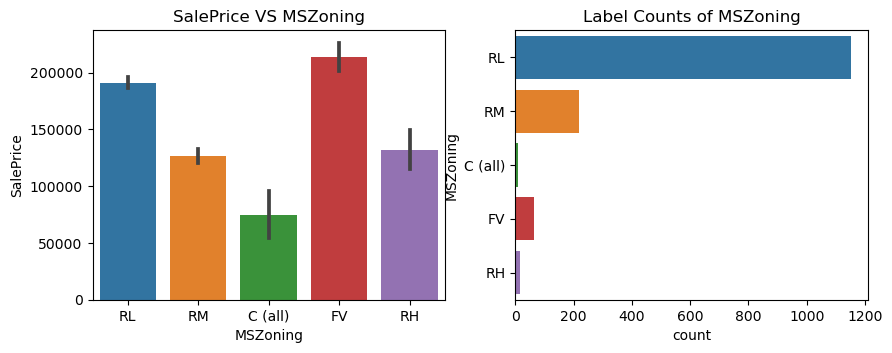

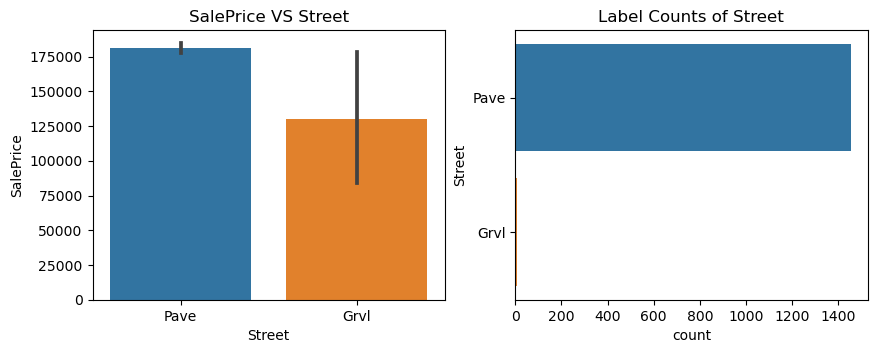

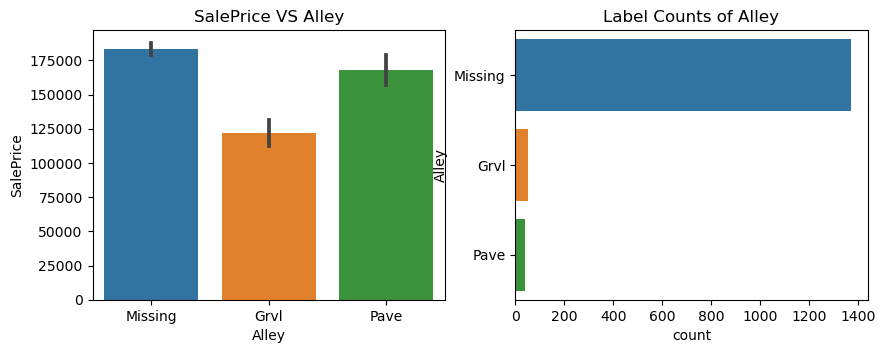

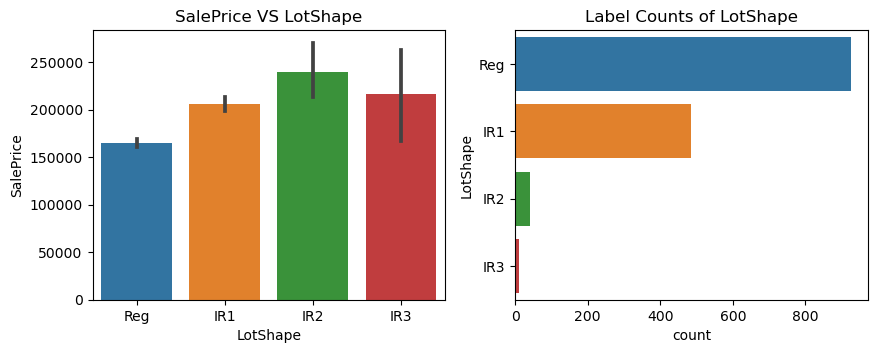

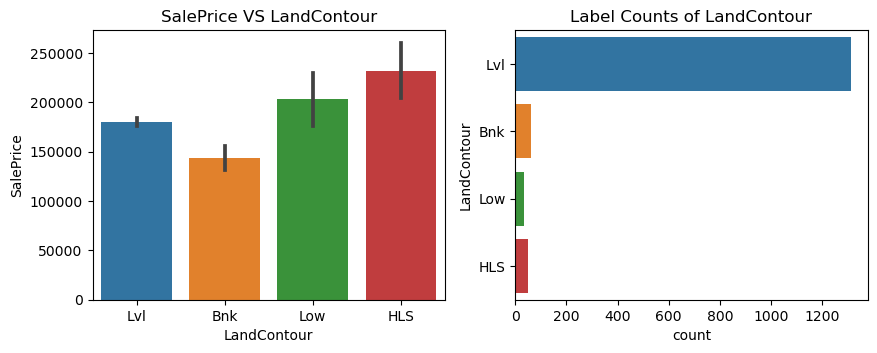

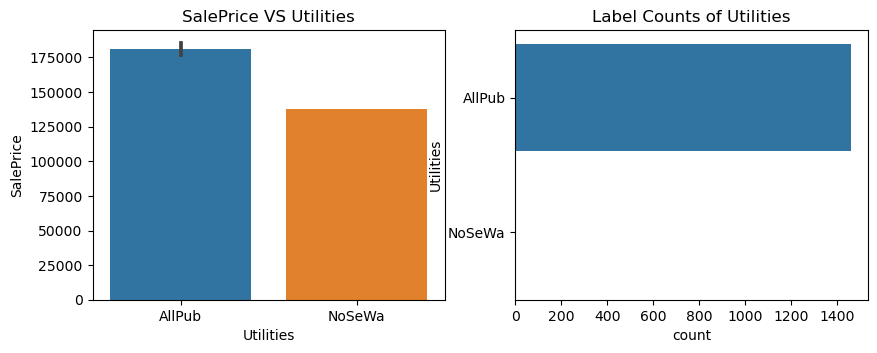

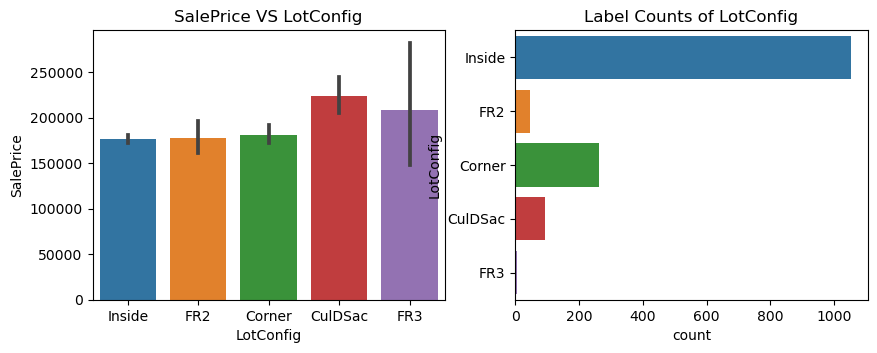

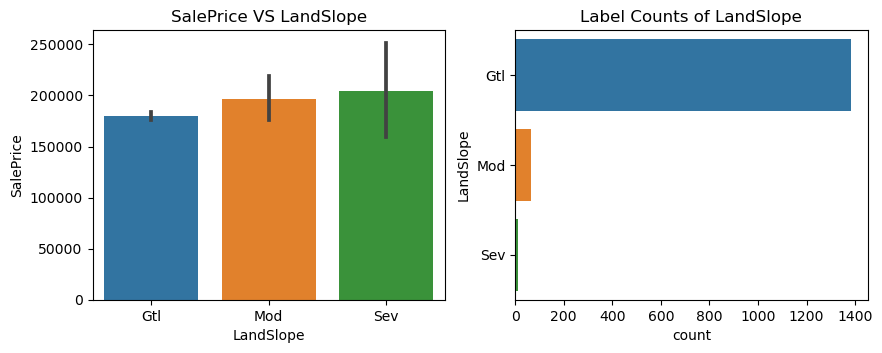

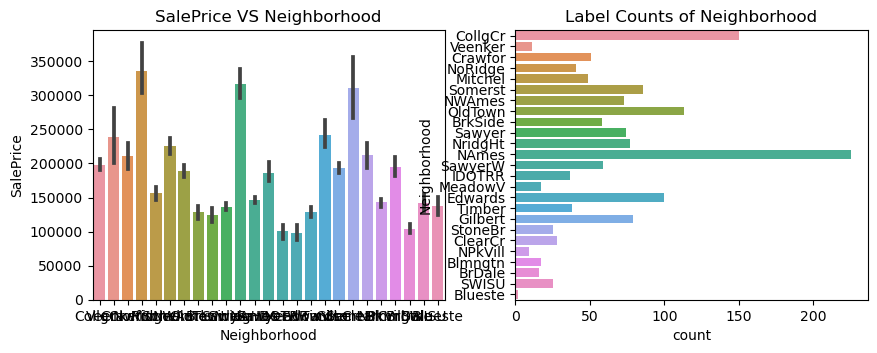

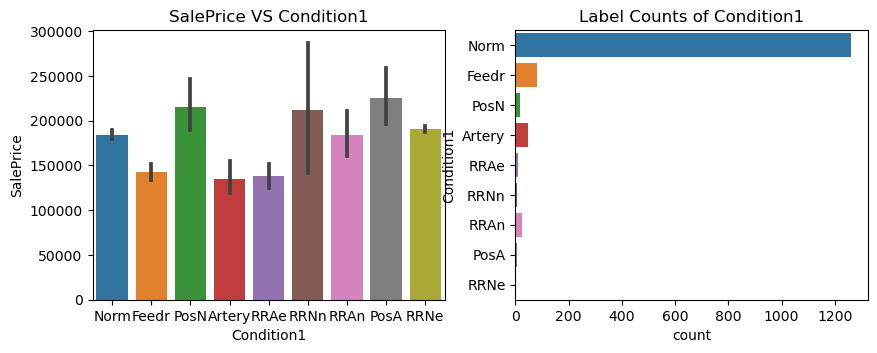

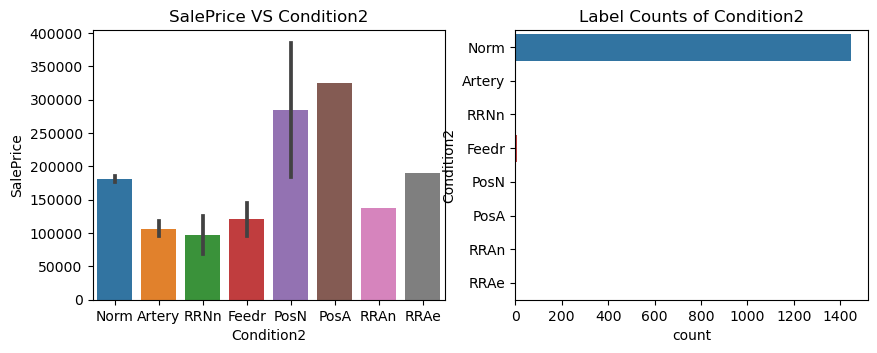

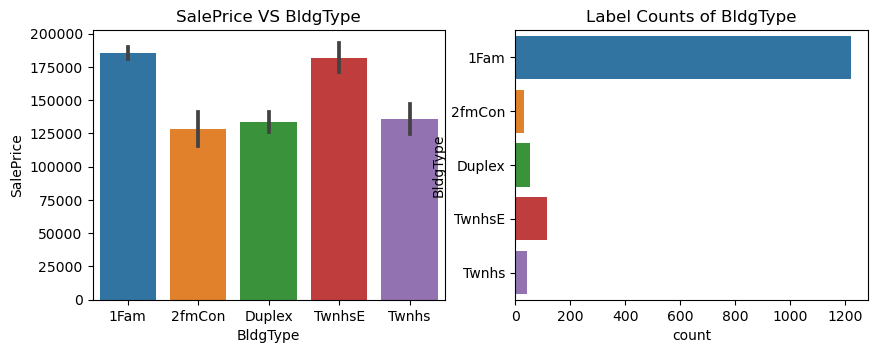

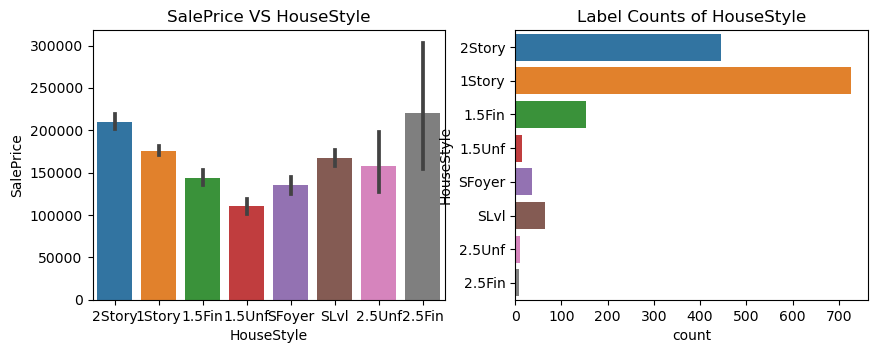

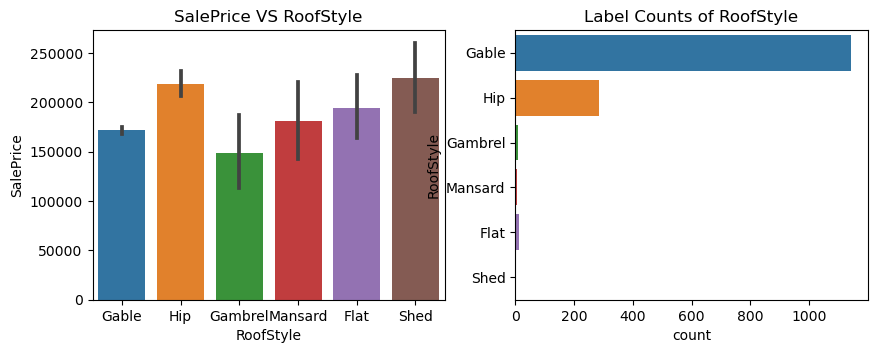

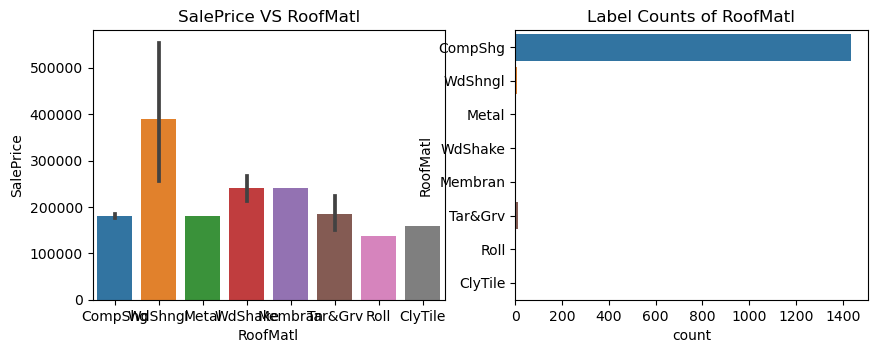

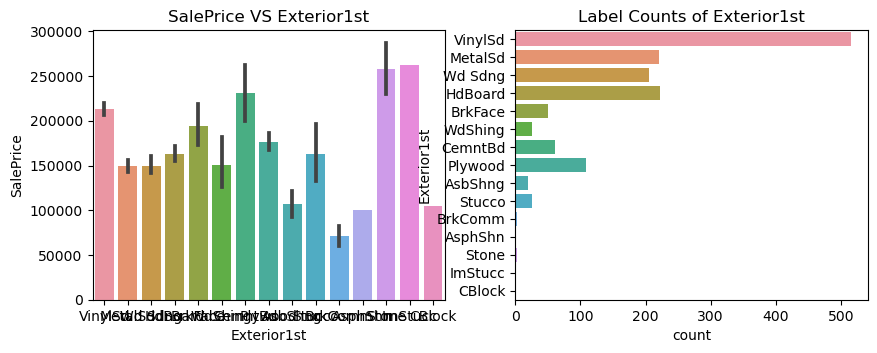

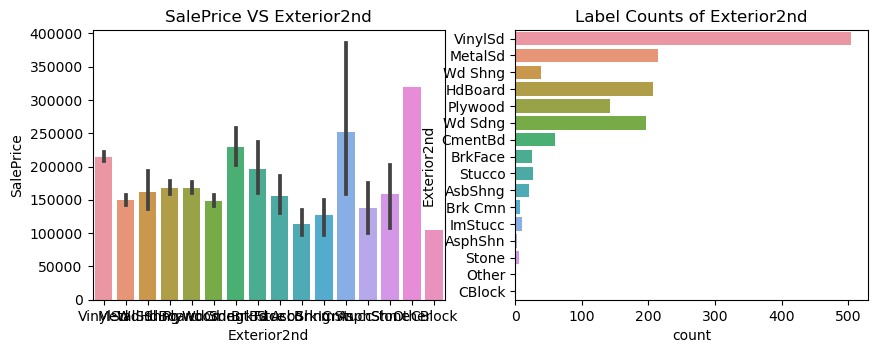

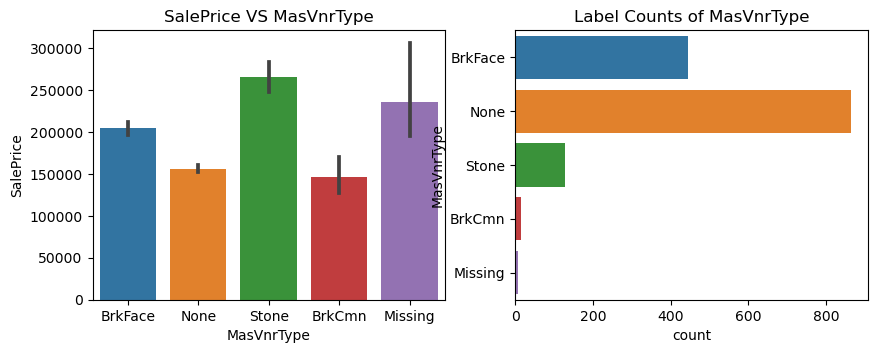

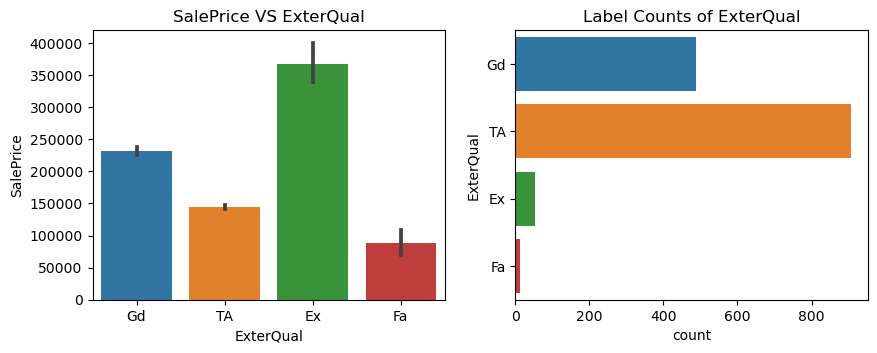

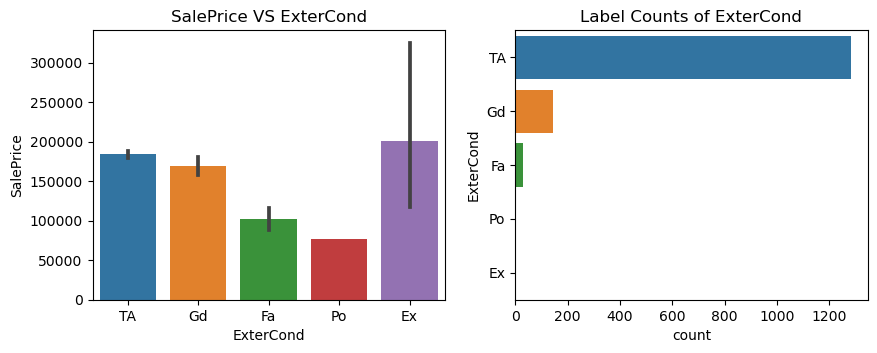

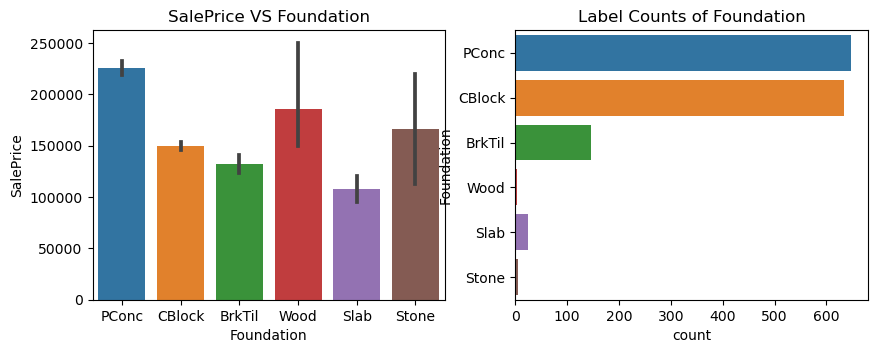

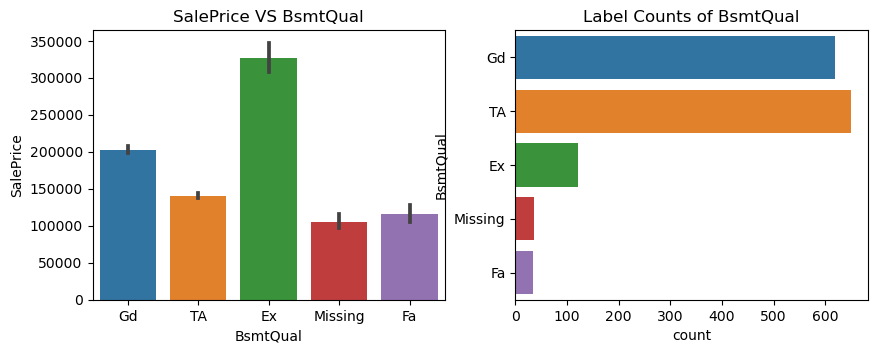

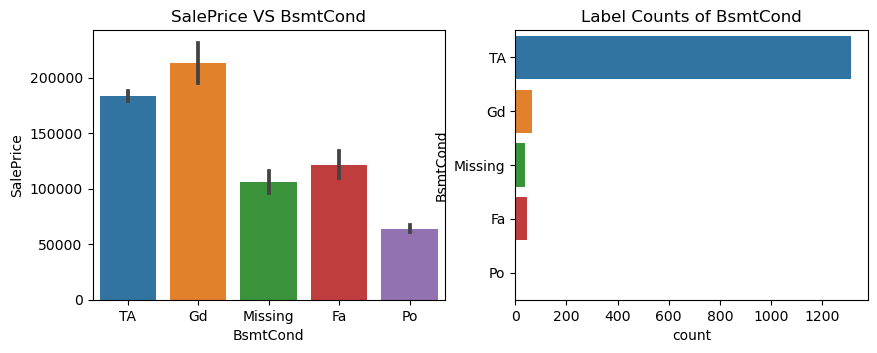

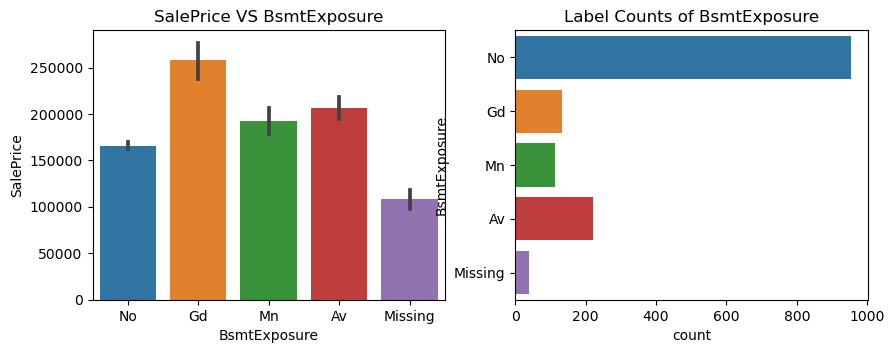

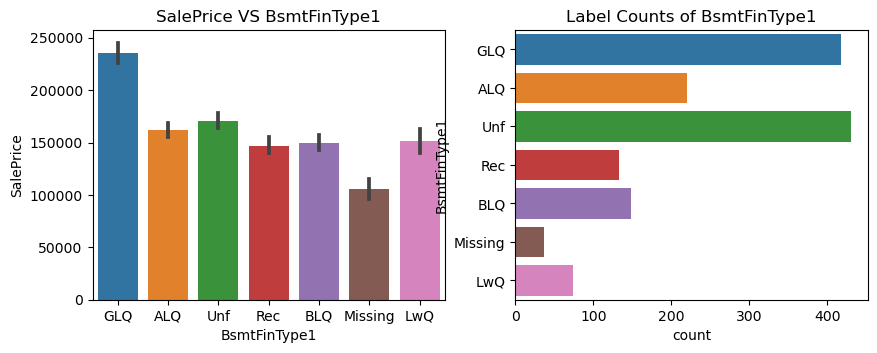

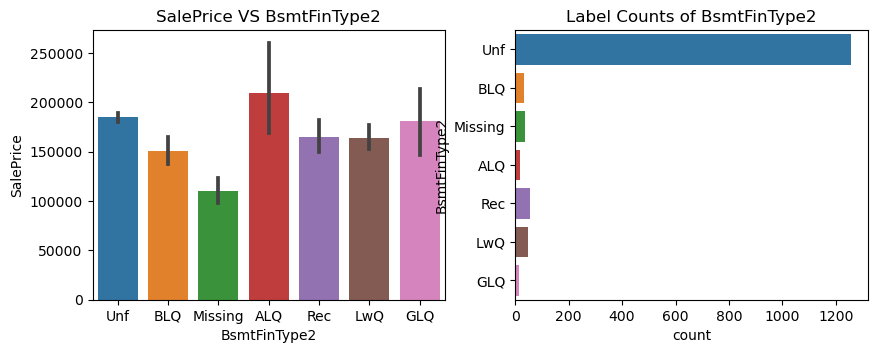

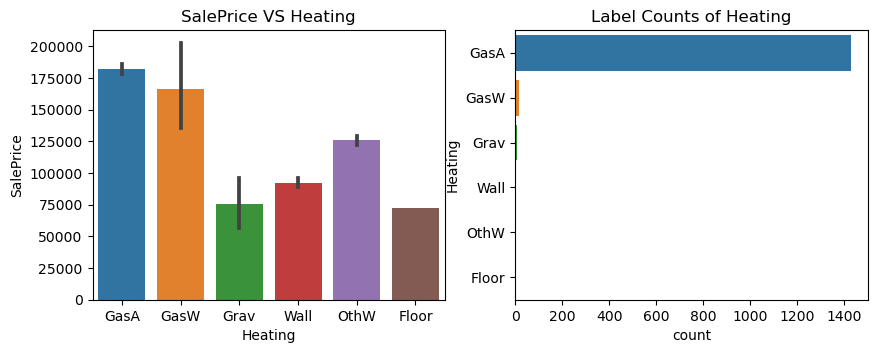

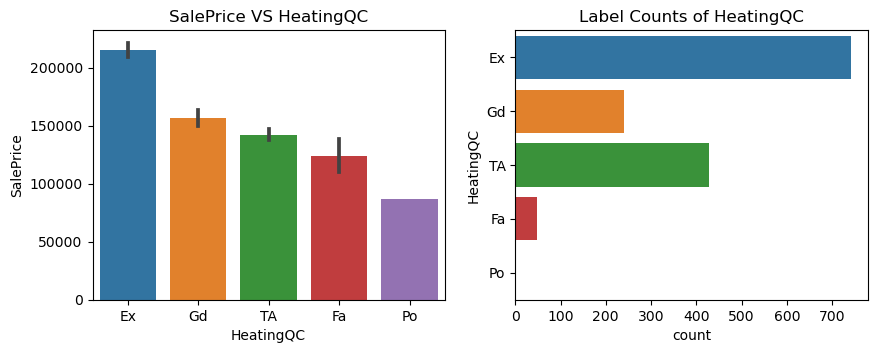

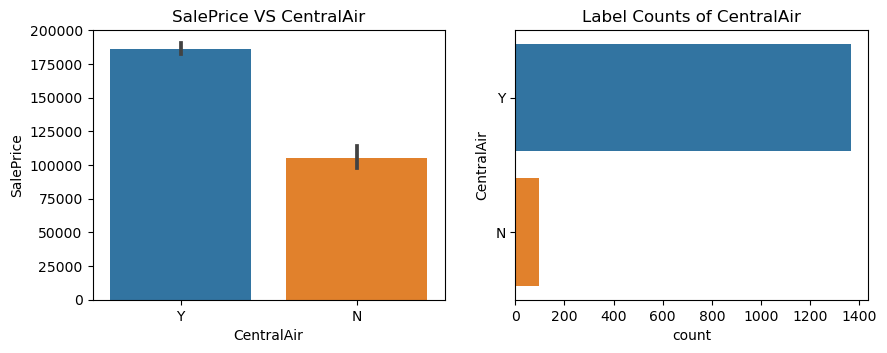

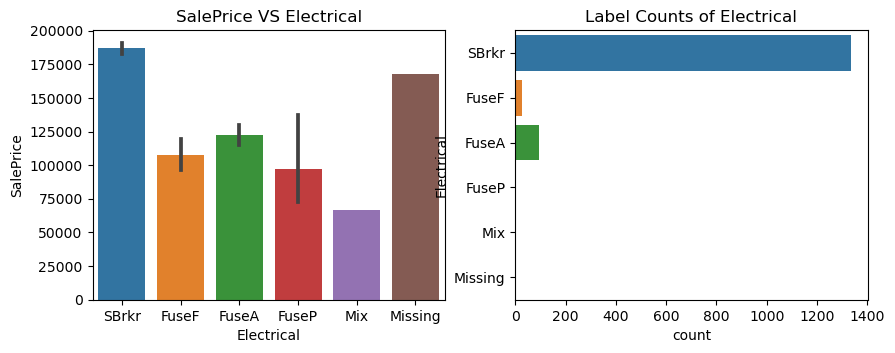

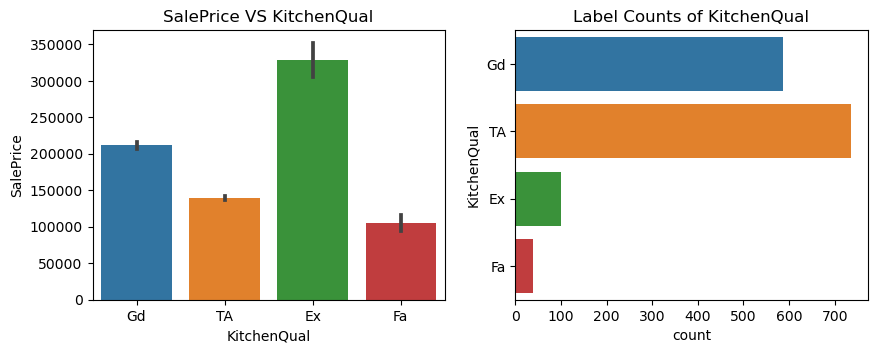

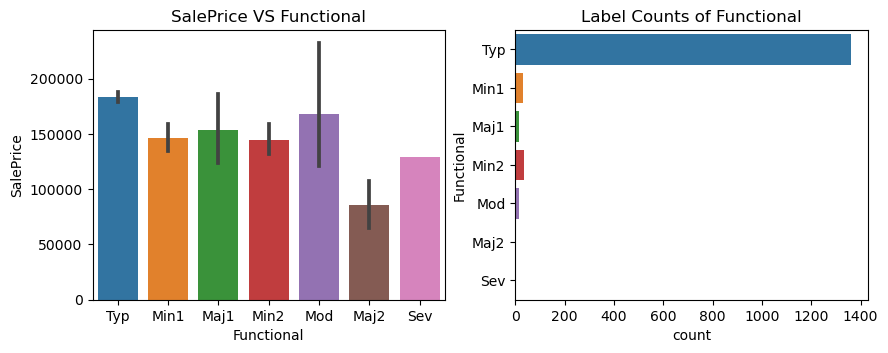

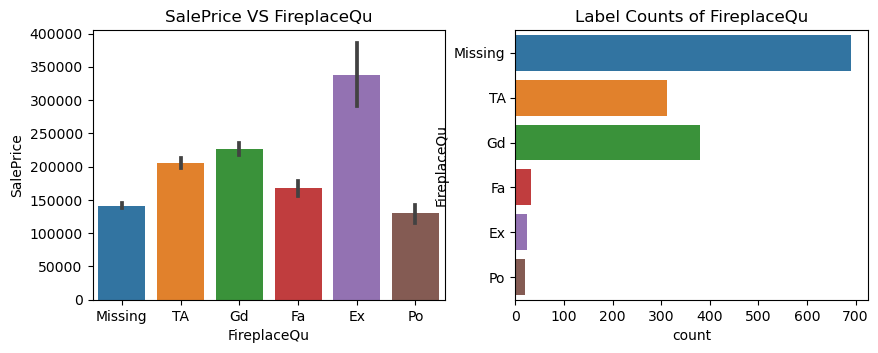

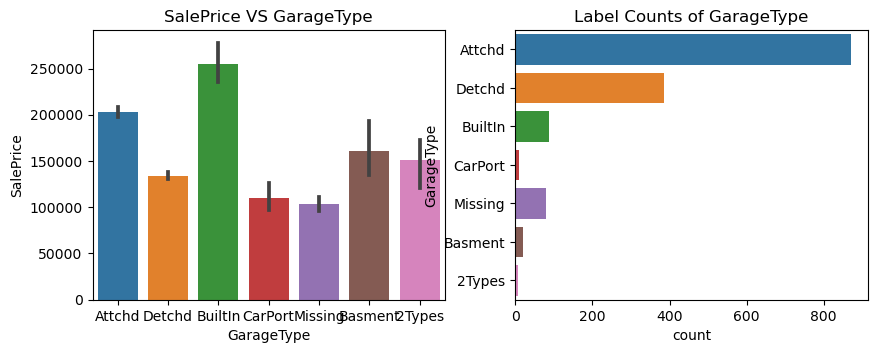

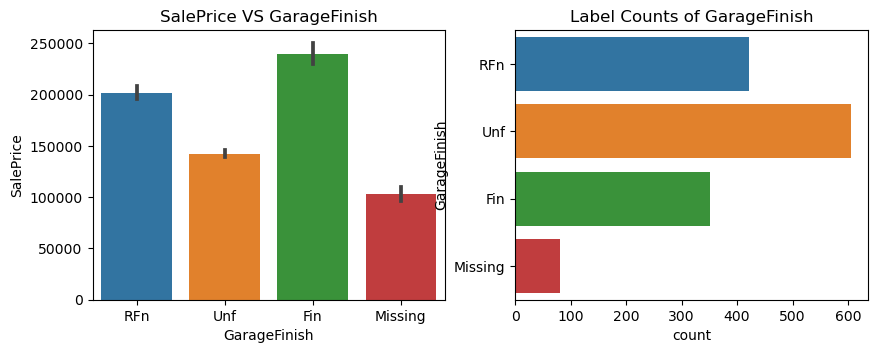

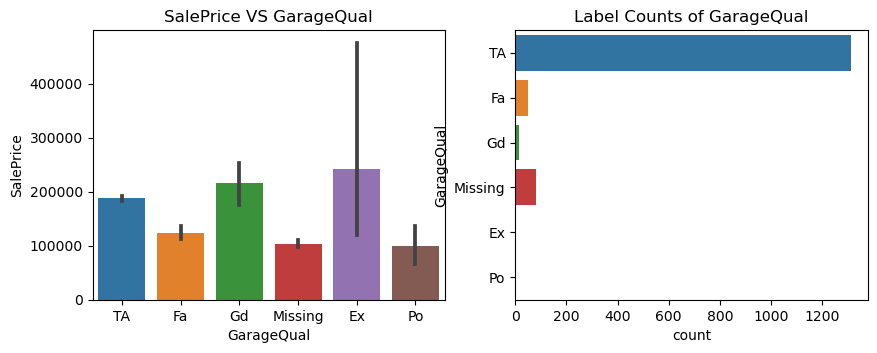

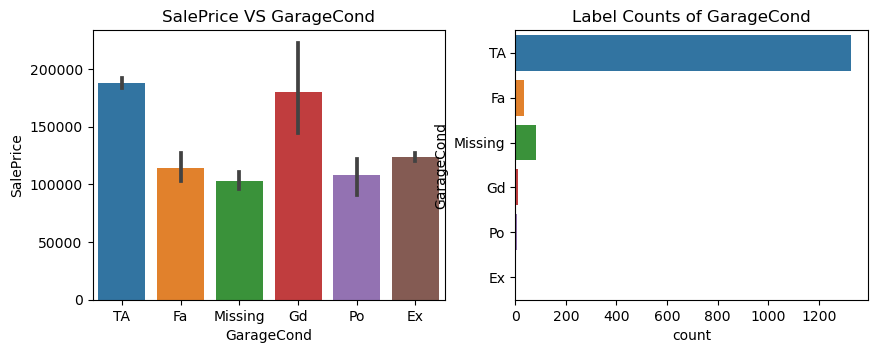

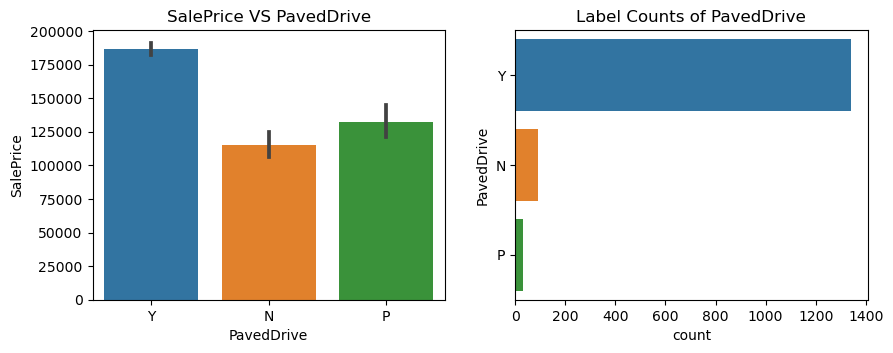

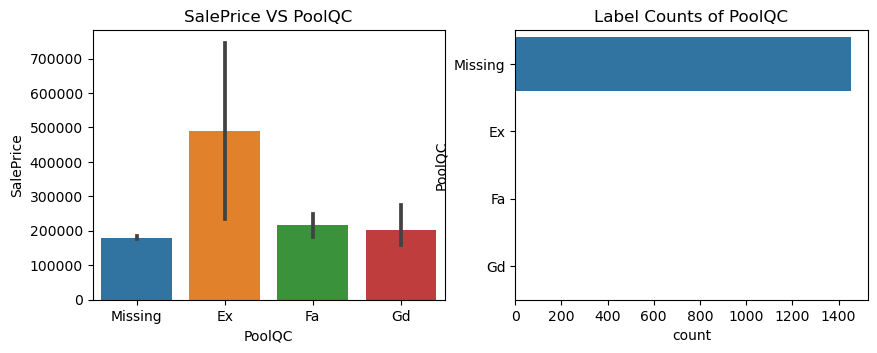

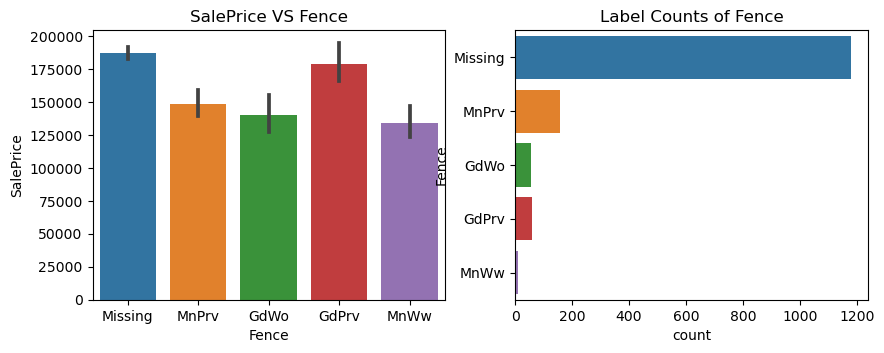

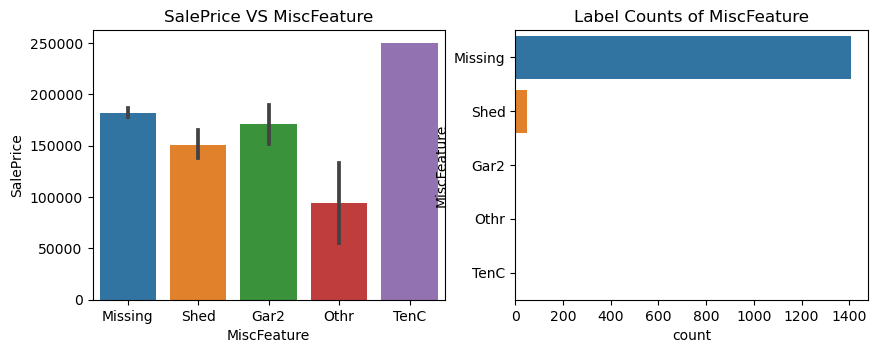

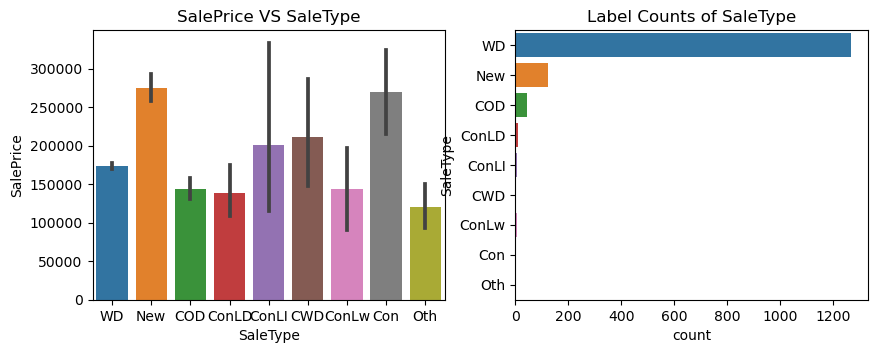

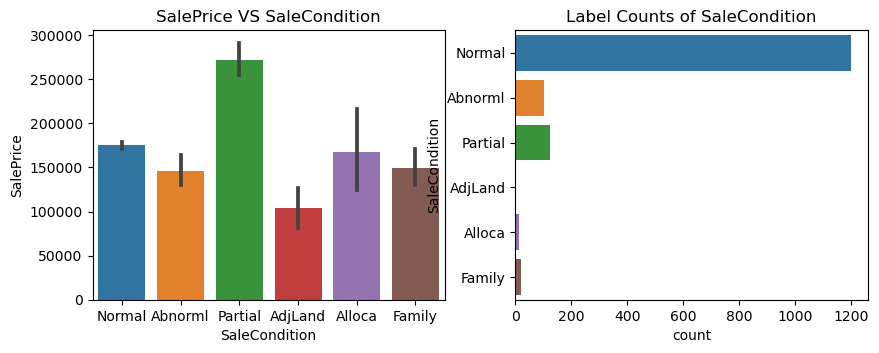

In [25]:
for i in categorical_features:
    plot(copy,i)

### Brief Summary of  categorical features
in which we show number of Labels, Mode, Total Counts, Percent Null value of each feature

In [26]:
for i in categorical_features:
    print('Summary of',i)
    print('*'*20)
    print('Counts:',copy[i].count(),'            ','Mode:',copy[i].mode()[0])
    print("Null values:",round(copy[i].isnull().sum()*100/len(copy[i]),2),'%       ','Labels',len(copy[i].unique()))
    print('-'*40)

Summary of MSZoning
********************
Counts: 1460              Mode: RL
Null values: 0.0 %        Labels 5
----------------------------------------
Summary of Street
********************
Counts: 1460              Mode: Pave
Null values: 0.0 %        Labels 2
----------------------------------------
Summary of Alley
********************
Counts: 1460              Mode: Missing
Null values: 0.0 %        Labels 3
----------------------------------------
Summary of LotShape
********************
Counts: 1460              Mode: Reg
Null values: 0.0 %        Labels 4
----------------------------------------
Summary of LandContour
********************
Counts: 1460              Mode: Lvl
Null values: 0.0 %        Labels 4
----------------------------------------
Summary of Utilities
********************
Counts: 1460              Mode: AllPub
Null values: 0.0 %        Labels 2
----------------------------------------
Summary of LotConfig
********************
Counts: 1460              Mode: In

## Analyze DateTime Data

In [27]:
copy[year_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

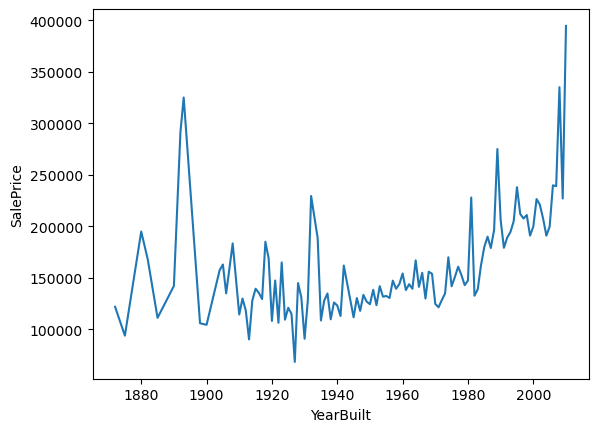

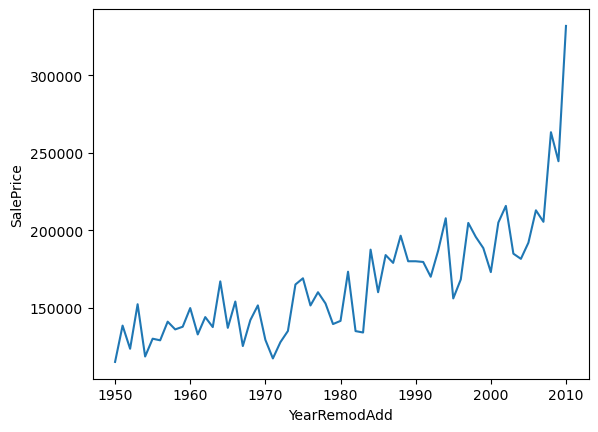

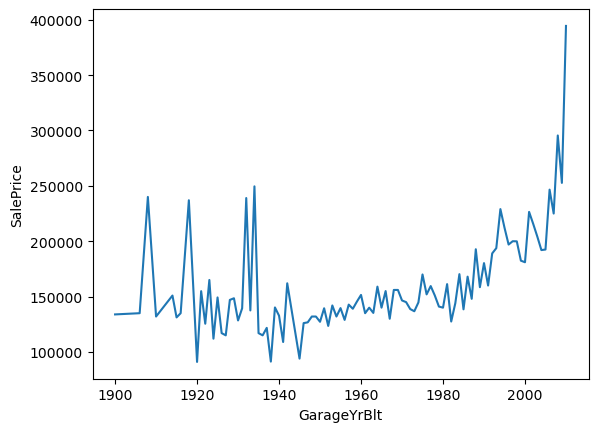

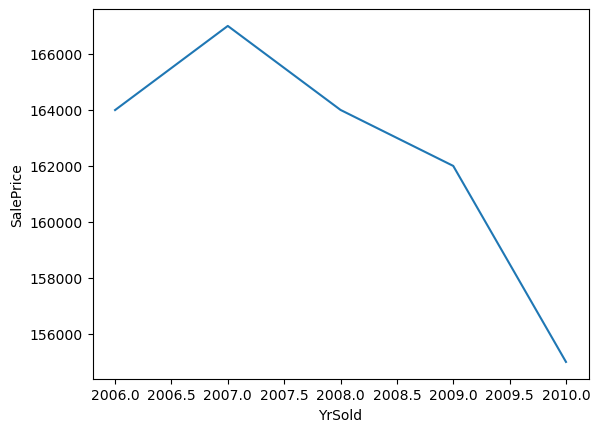

In [28]:
for i in year_features:
    copy.groupby(i)['SalePrice'].median().plot()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

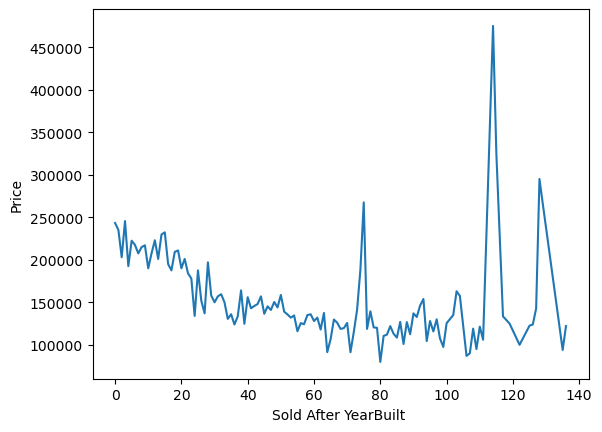

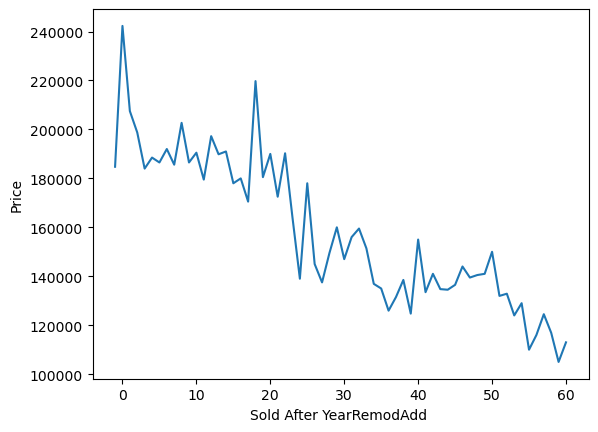

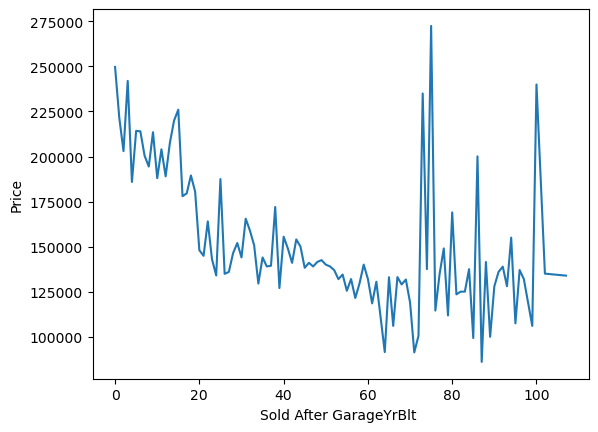

In [29]:
for i in year_features:
    copy1=data.copy()
    if i != 'YrSold':
        copy1[i]=copy1['YrSold']-copy1[i]
        
        copy1.groupby(i)['SalePrice'].median().plot()
        plt.ylabel('Price')
        plt.xlabel('Sold After {} '.format(i))
        plt.show()
      

## Analyze Numerical features with respect to SalePrice
Here we will plot two graphs one shows relationship with SalePrice and other will tell distribution of feature

In [30]:
copy[numerical_features].head(5) 

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  
0         0        0       2     208500  
1         0        0       5     181500  
2         0        0       9     223500  
3         0        0       2     140000  
4         0        0      12     250000

### Split Continous and Discret Numerical features

In [31]:
con_num=[i for i in numerical_features if len(copy[i].unique())>=25] 
dis_num=[i for i in numerical_features if i not in con_num]

### Analyze discrete numerical feature wrt SalePrice

In [32]:
copy[dis_num].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

In [33]:
copy[dis_num].shape

(1460, 17)

### Summary

In [34]:
for i in dis_num:
    print('Summary of',i)
    print('*'*20)
    print('Counts:',copy[i].count(),'            ','Mode:',copy[i].mode()[0])
    print("Null values:",round(copy[i].isnull().sum()*100/len(copy[i]),2),'%       ','Labels',len(copy[i].unique()))
    print('-'*40)

Summary of MSSubClass
********************
Counts: 1460              Mode: 20
Null values: 0.0 %        Labels 15
----------------------------------------
Summary of OverallQual
********************
Counts: 1460              Mode: 5
Null values: 0.0 %        Labels 10
----------------------------------------
Summary of OverallCond
********************
Counts: 1460              Mode: 5
Null values: 0.0 %        Labels 9
----------------------------------------
Summary of LowQualFinSF
********************
Counts: 1460              Mode: 0
Null values: 0.0 %        Labels 24
----------------------------------------
Summary of BsmtFullBath
********************
Counts: 1460              Mode: 0
Null values: 0.0 %        Labels 4
----------------------------------------
Summary of BsmtHalfBath
********************
Counts: 1460              Mode: 0
Null values: 0.0 %        Labels 3
----------------------------------------
Summary of FullBath
********************
Counts: 1460              Mod

### Discrete features Vs SalePrice

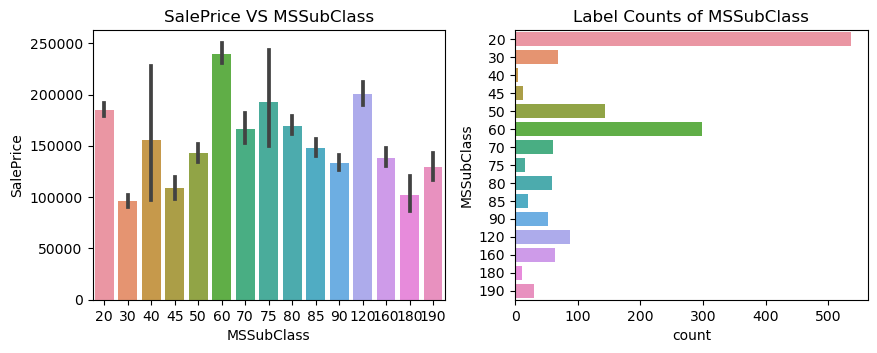

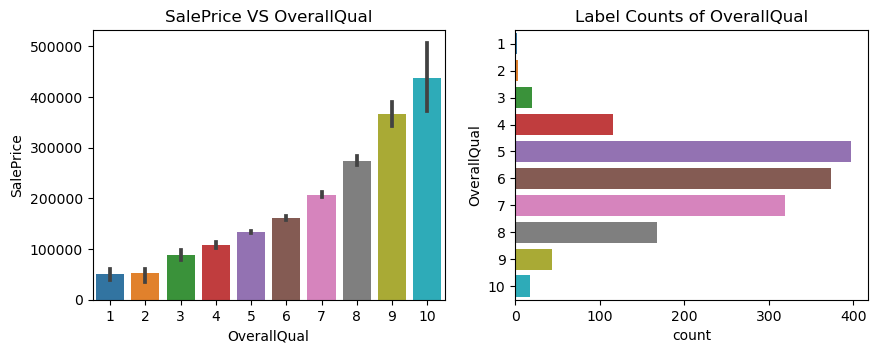

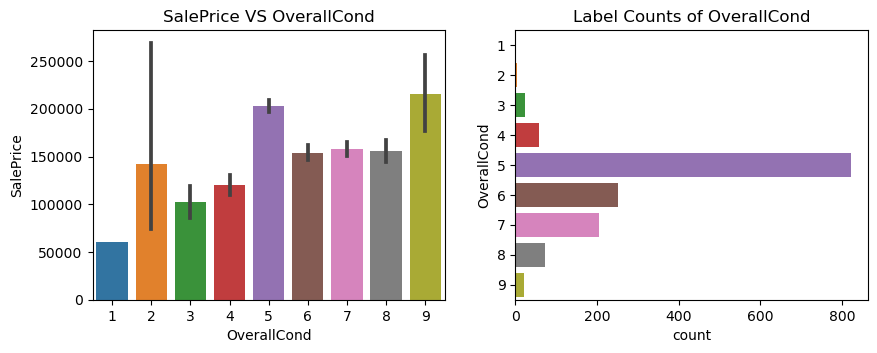

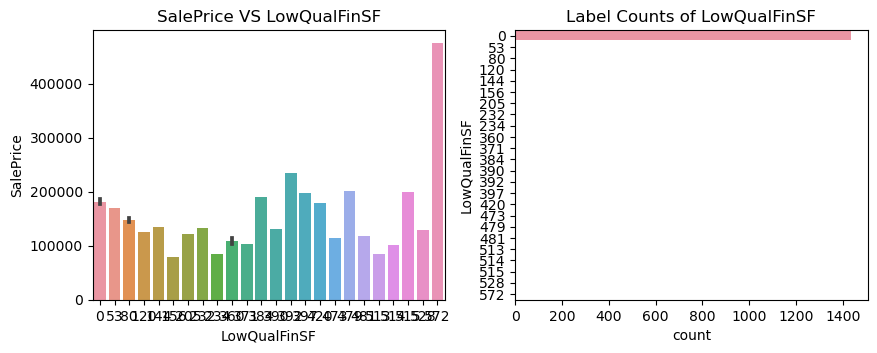

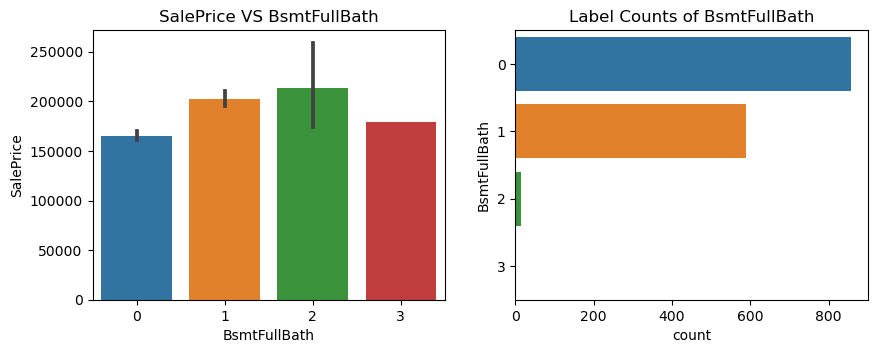

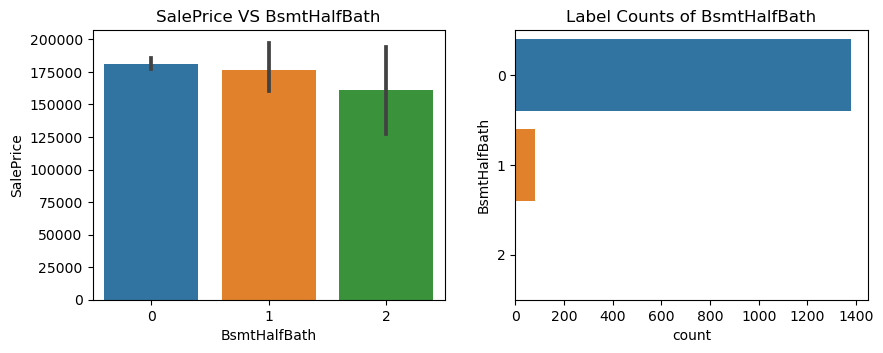

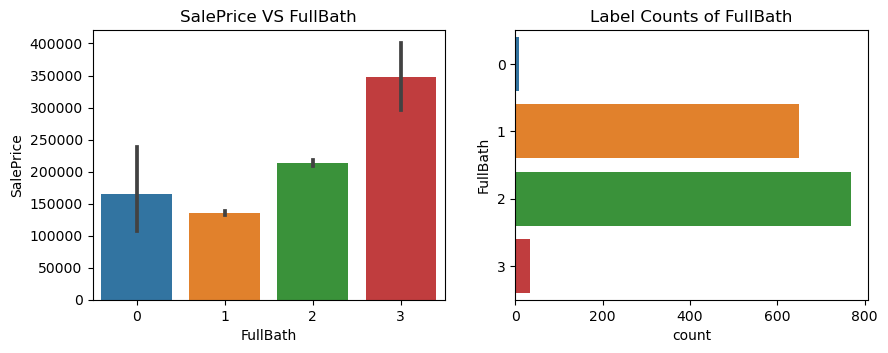

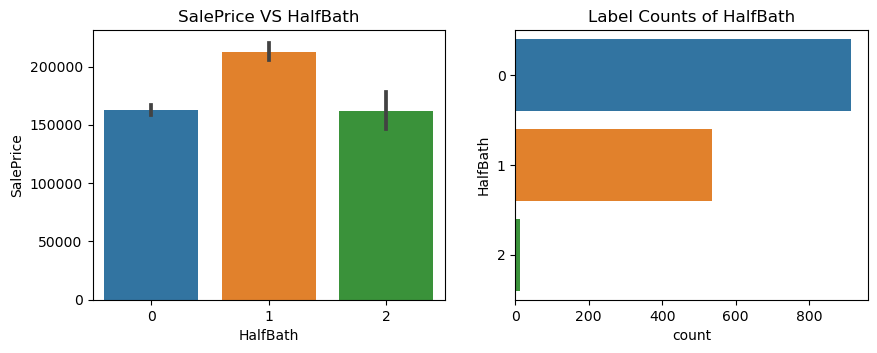

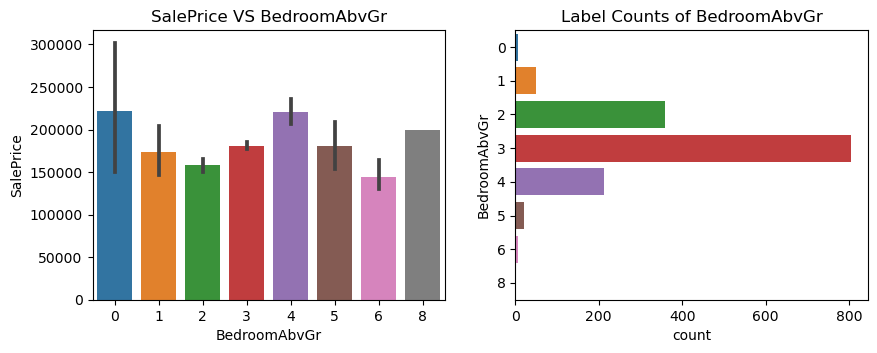

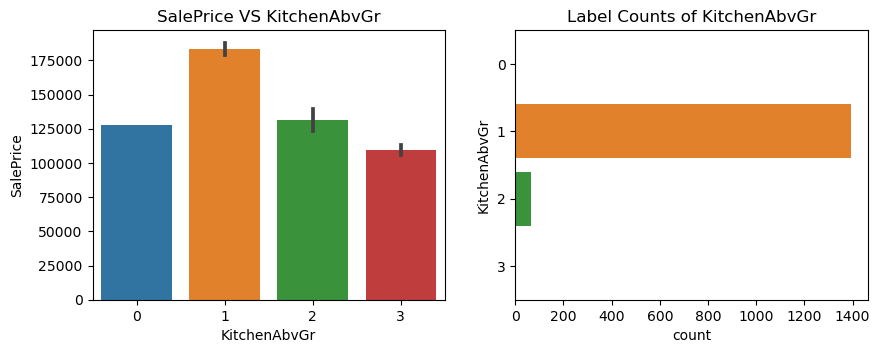

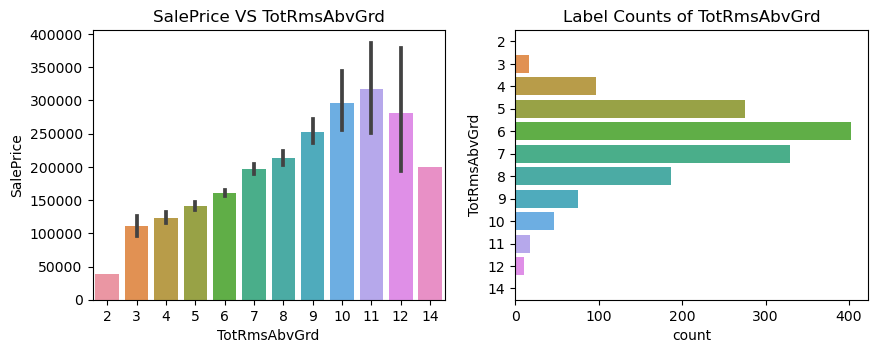

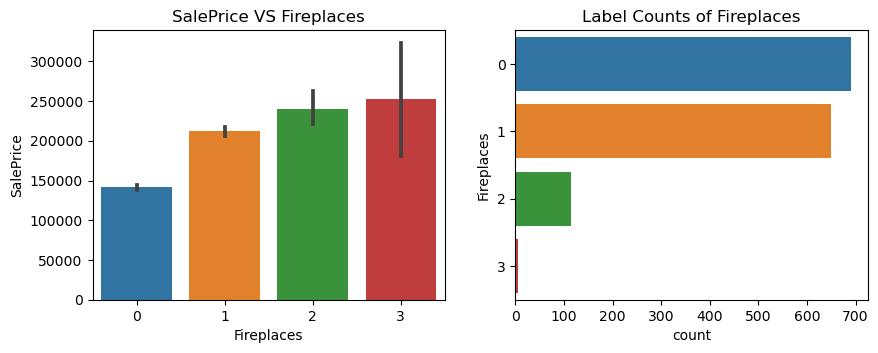

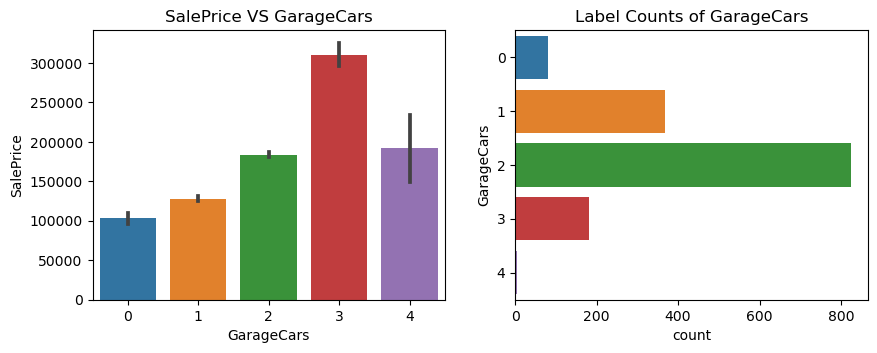

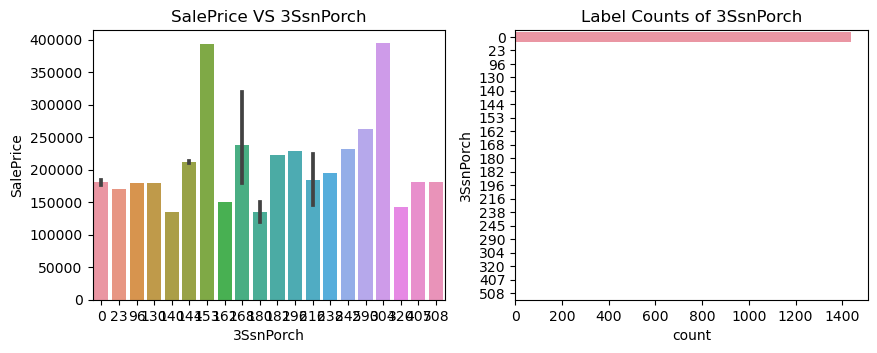

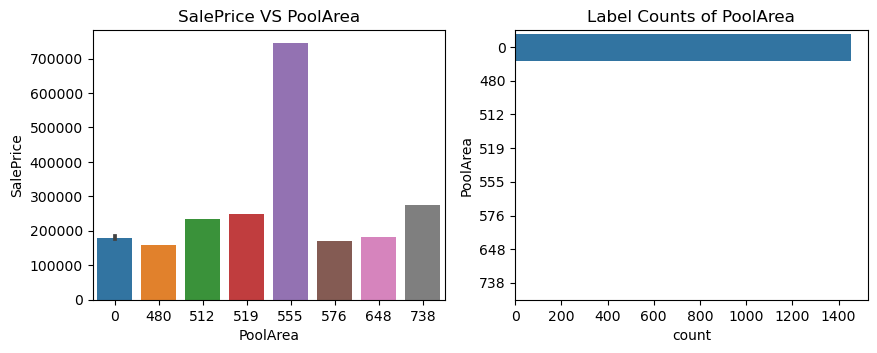

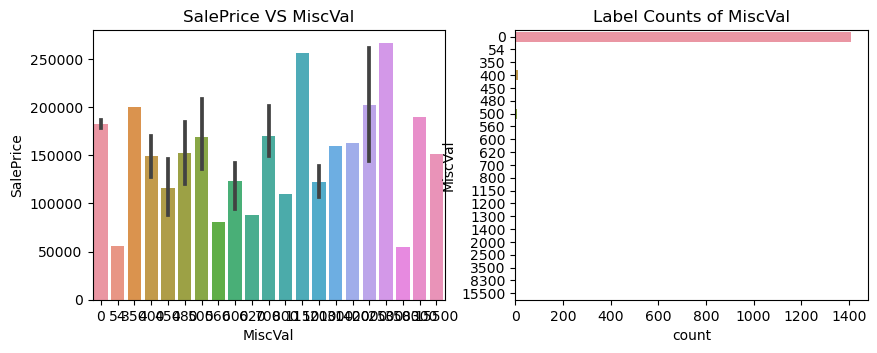

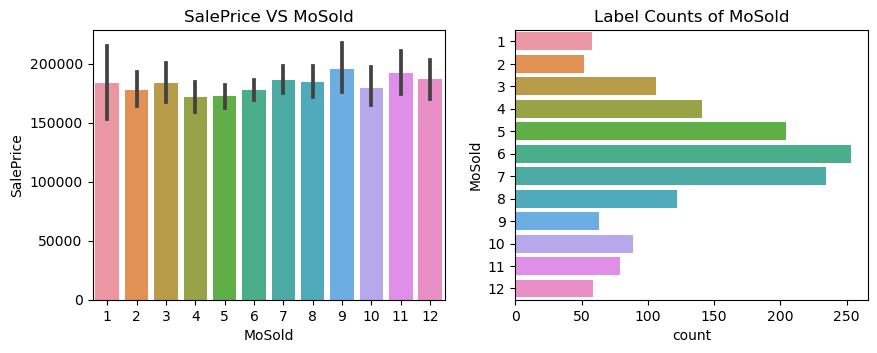

In [35]:
for i in dis_num:
    plot(copy,i)

### Analyze continous numerical feature wrt SalePrice

In [36]:
copy[con_num].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

In [37]:
copy[con_num].shape

(1460, 16)

### descriptive analysis

In [38]:
copy[con_num].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466  1515.463699   
std     441.866955   438.705324   386.587738   436.528436   525.480383   
min       0.000000     0.000000   334.000000     0.000000   334.000000   
25%     223.000000   795.750000   882.000000     0.000000  1129.500000   
50%     477.500000   991.500000  1087.000000     0.000000  1464.000000   
75%     808.000000  1298.250000  1391.250000   728.000000  1776.750000   
max    2336.000000  6110.000000  4692.000000  2065.000000  5642.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110    15.060959   
std     213.804841   125.338794    66.256028      61.119149    55.757415   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   480.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000

### Check relation b/w Continous feature and SalePrice also check Distribution and Outliers

In [39]:
for i in con_num:
    copy[i]=np.where(copy[i].isnull(),0,copy[i])

In [40]:
def plot_d(data,feature):
    plt.figure(figsize=(14,3))
    plt.subplot(1,4,1)
    plt.hist(data[feature])
    plt.title("Distribution of {}".format(i))
    plt.xlabel(i)
    plt.ylabel("count")
    plt.subplot(1,4,2)
    st.probplot(data[feature],dist='norm',plot=pylab)
    plt.title("Probability plot of {}".format(i))
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.subplot(1,4,3)
    plt.title("Outliers in {}".format(i))
    sns.boxplot(data[feature])
    plt.subplot(1,4,4)
    plt.scatter(data[feature],y=data['SalePrice'])
    plt.title("SalePrice VS {}".format(feature))
    plt.show()

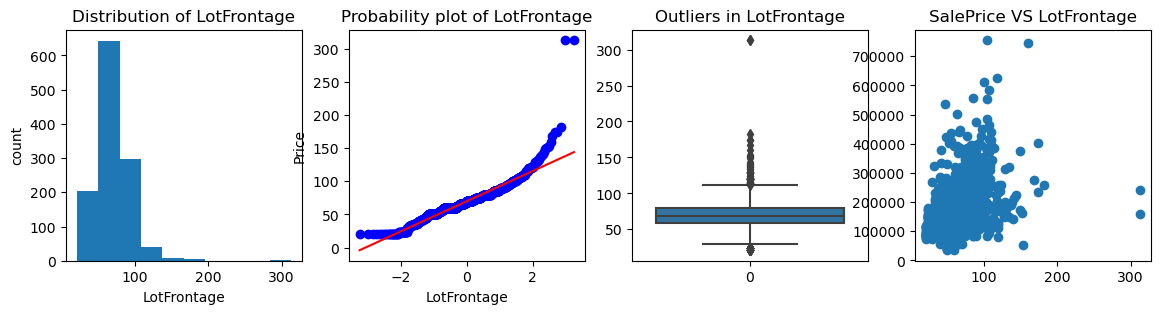

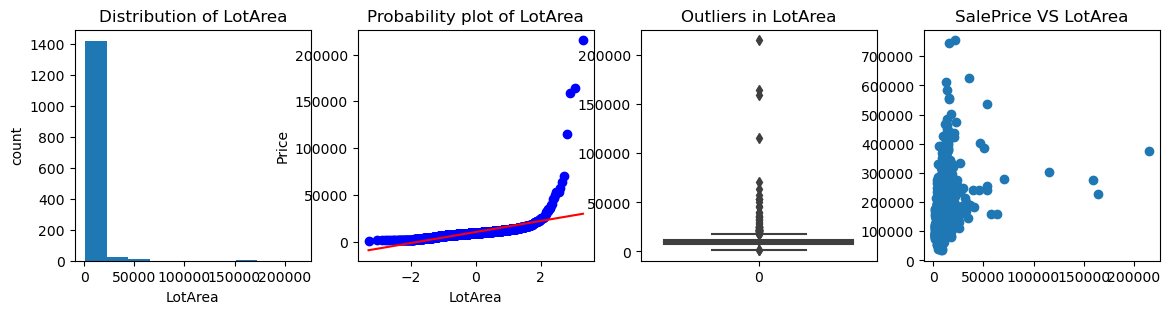

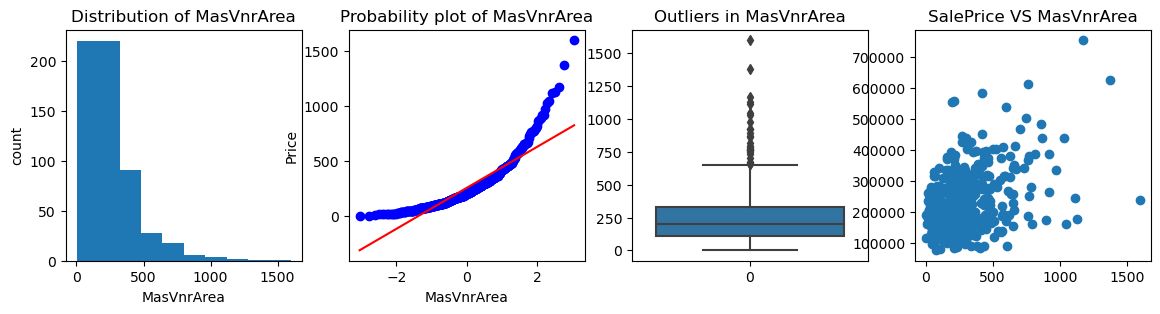

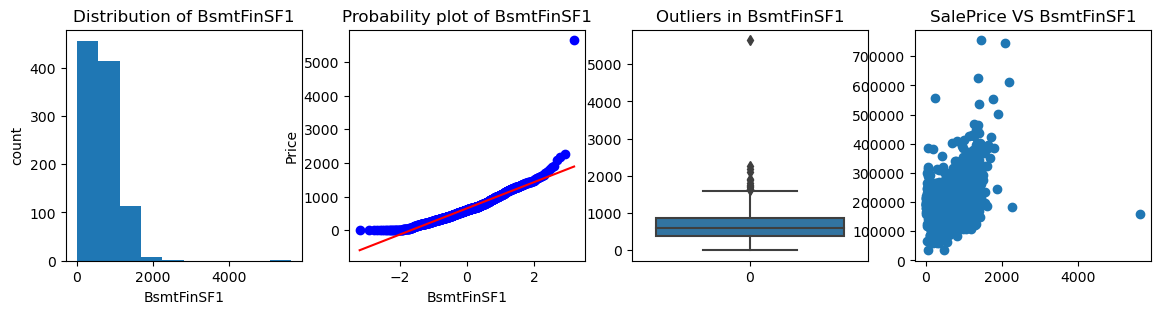

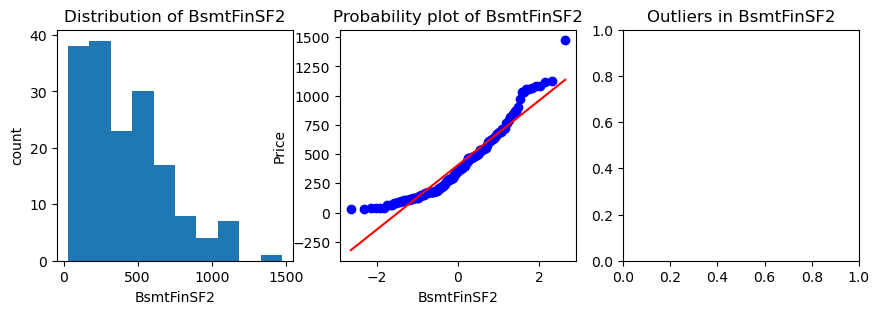

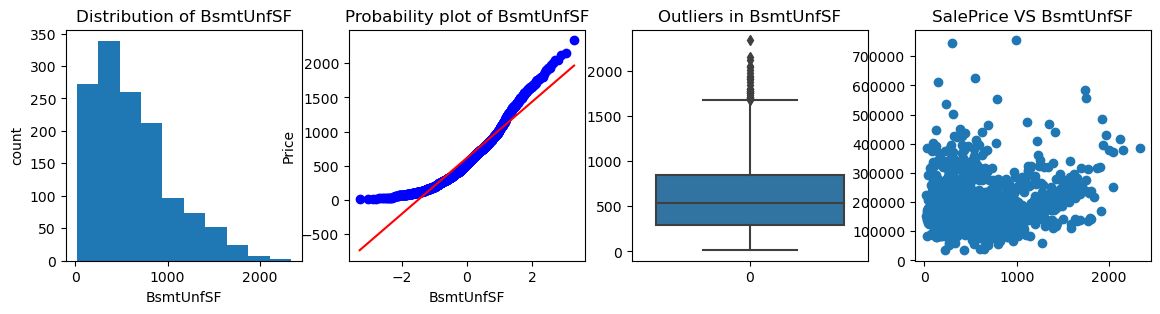

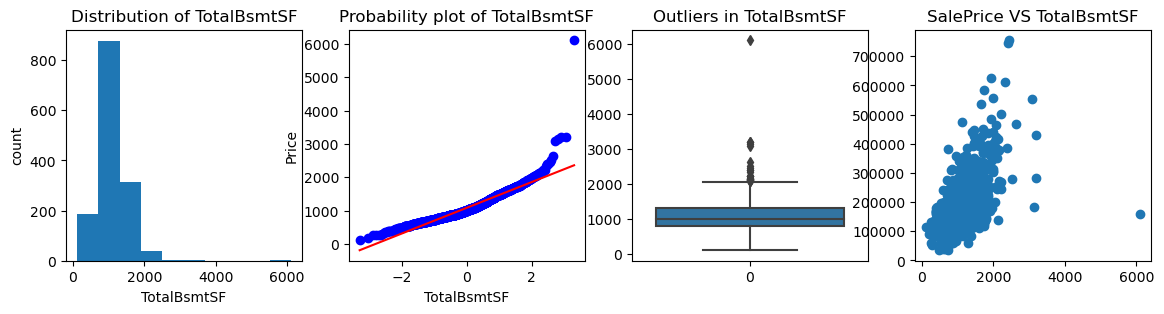

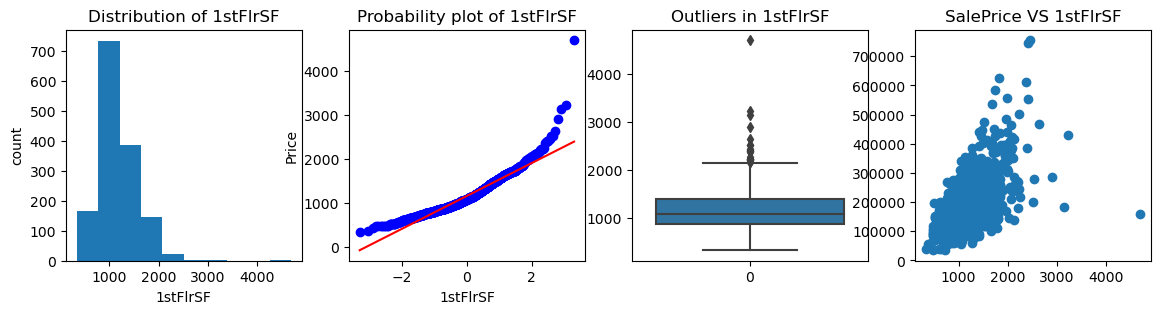

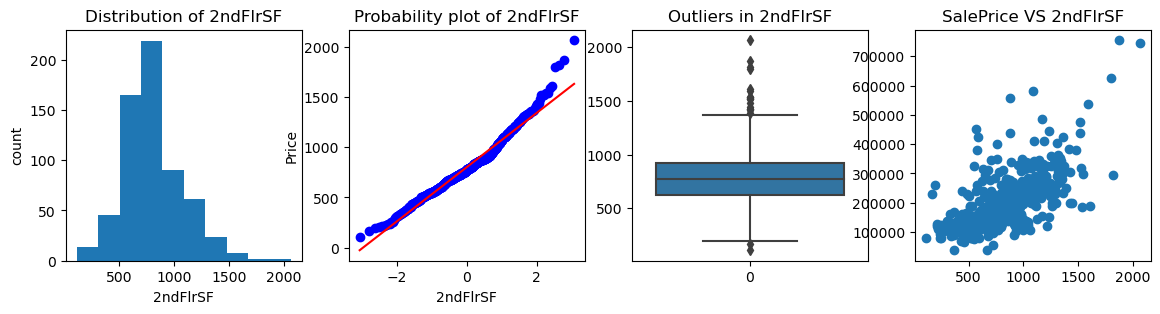

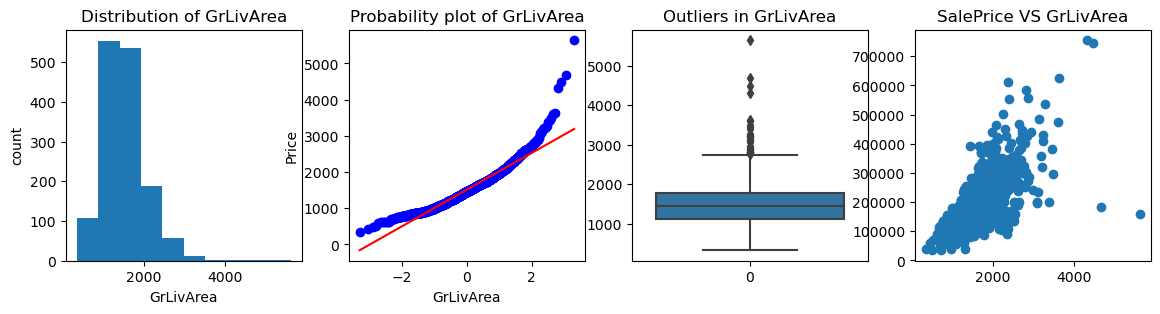

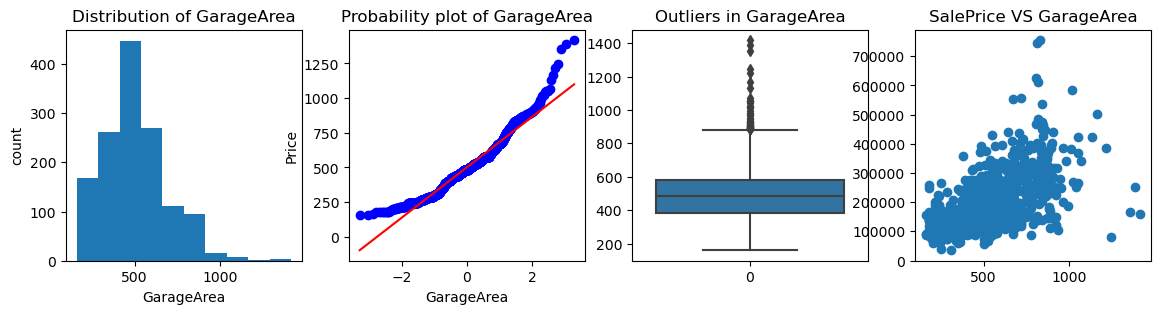

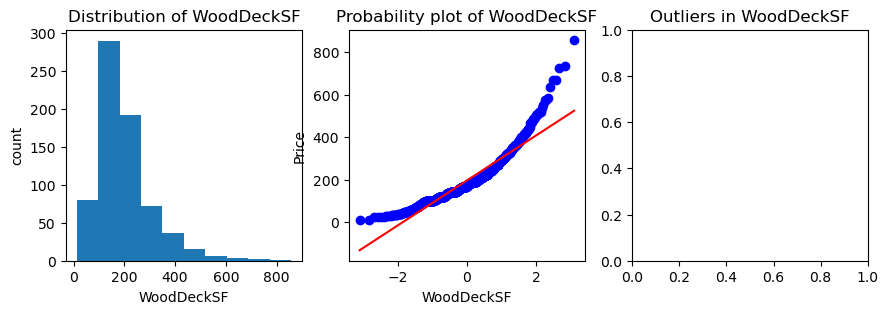

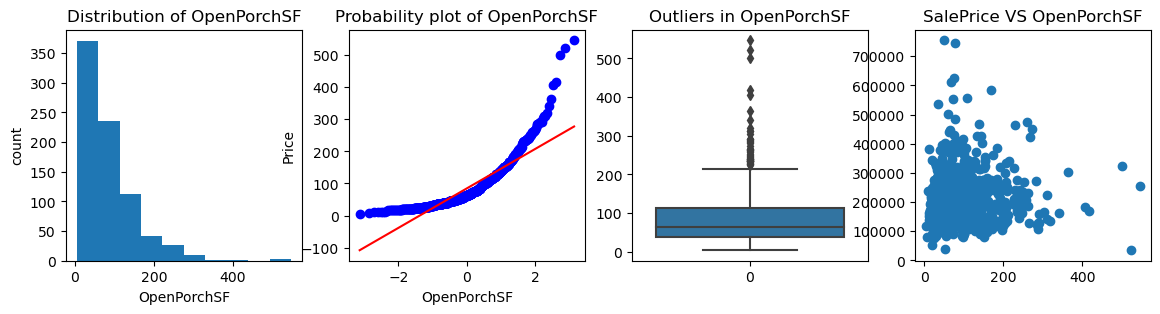

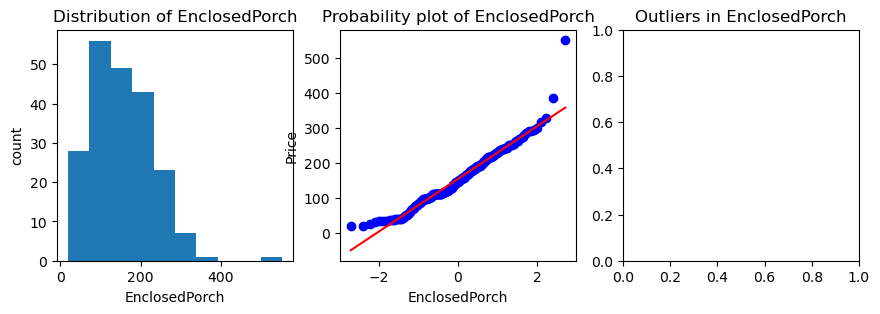

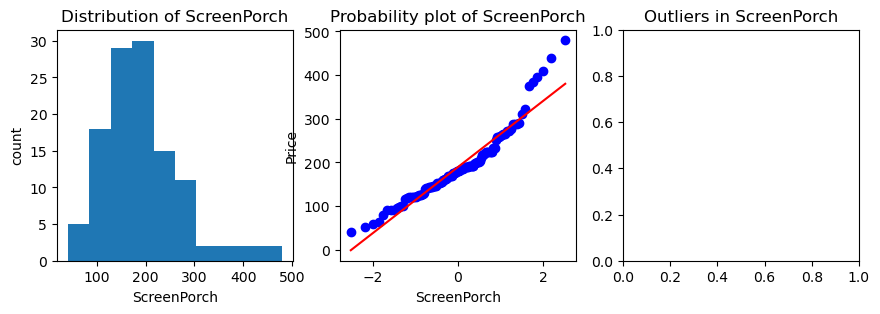

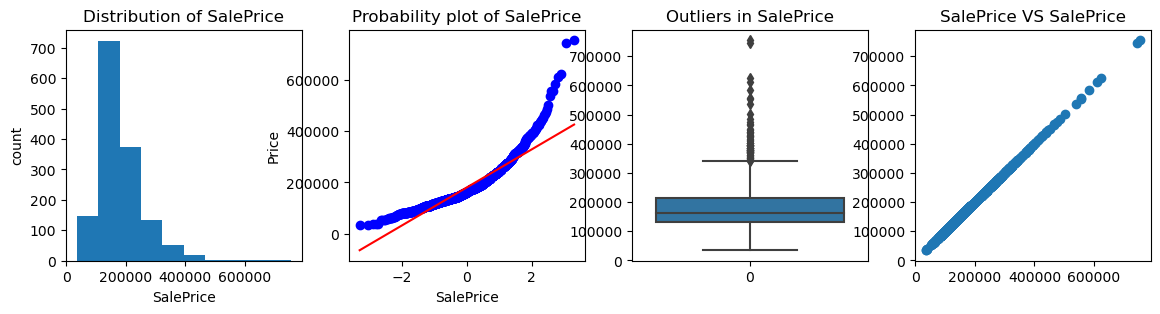

In [42]:
for i in con_num:
    try:
        plot_d(copy[copy[i]>0],i)
    except:
        pass

## Correlation

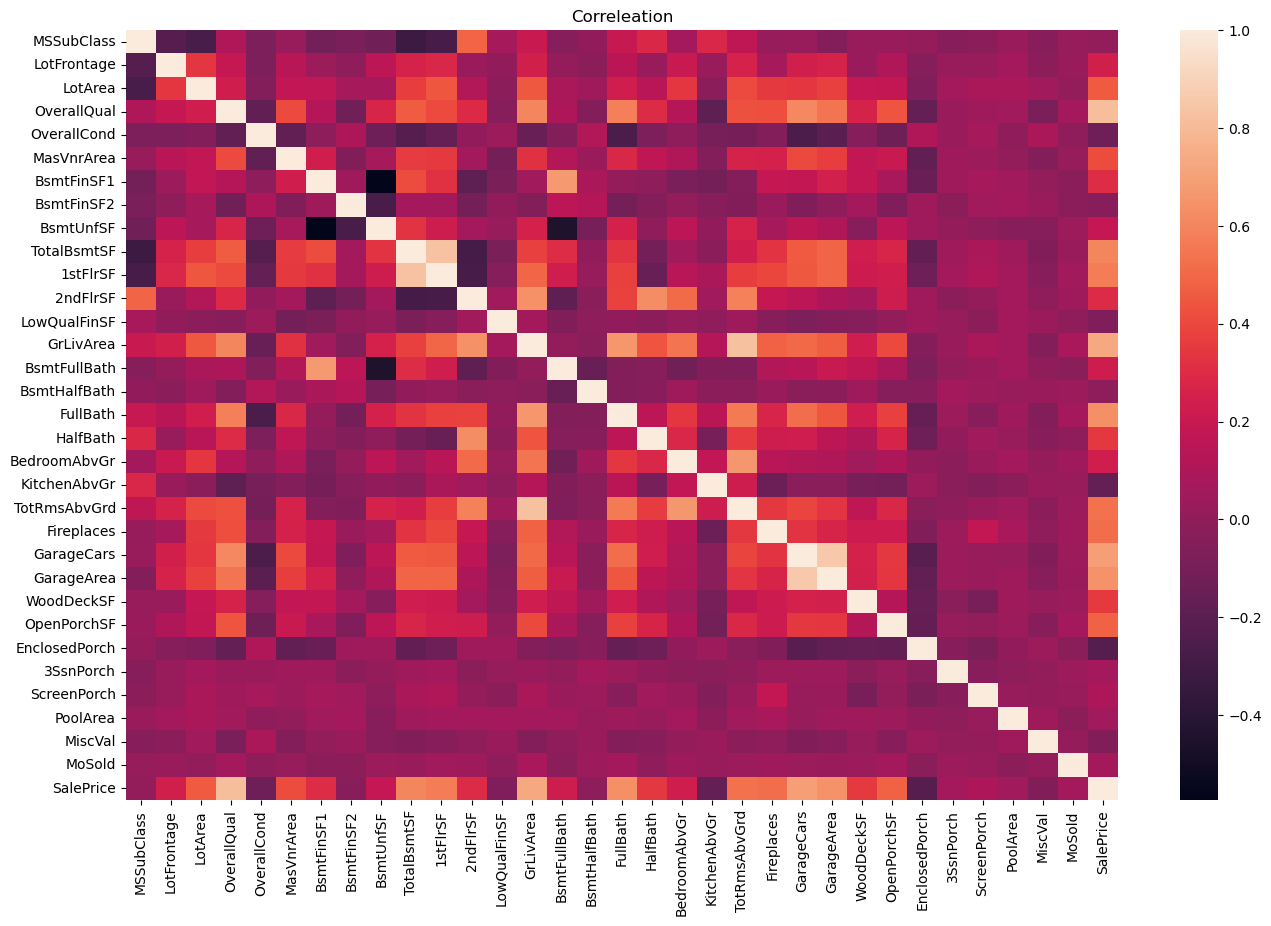

In [43]:
plt.figure(figsize=(16,10))
plt.title("Correleation")
sns.heatmap(copy[numerical_features].corr('spearman'))
plt.show()

### Correlation wrt SalePrice

In [44]:
copy.corr('spearman')['SalePrice']

C:\Users\swp\AppData\Local\Temp\ipykernel_14096\1673649940.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy.corr('spearman')['SalePrice']


MSSubClass       0.007192
LotFrontage      0.238496
LotArea          0.456461
OverallQual      0.809829
OverallCond     -0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.415906
BsmtFinSF1       0.301871
BsmtFinSF2      -0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF    -0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath    -0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr    -0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch   -0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal         -0.062727
MoSold           0.069432
YrSold          -0.029899
SalePrice        1.000000
Name: SalePrice, dtype: float64

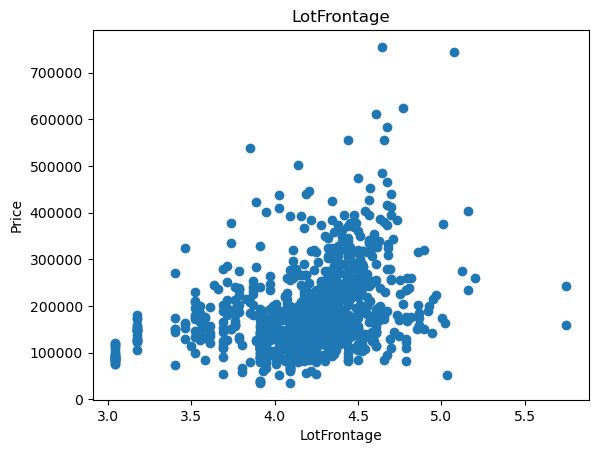

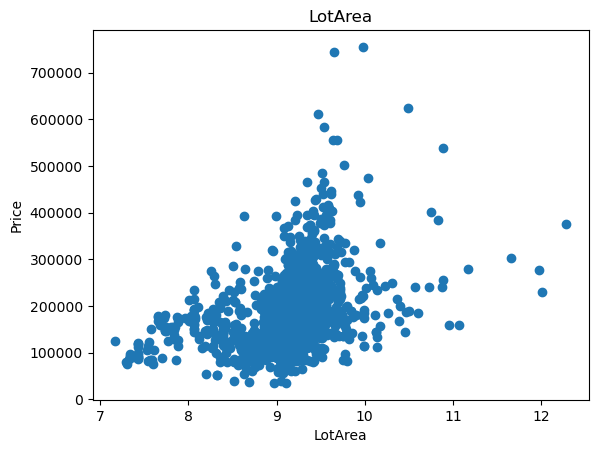

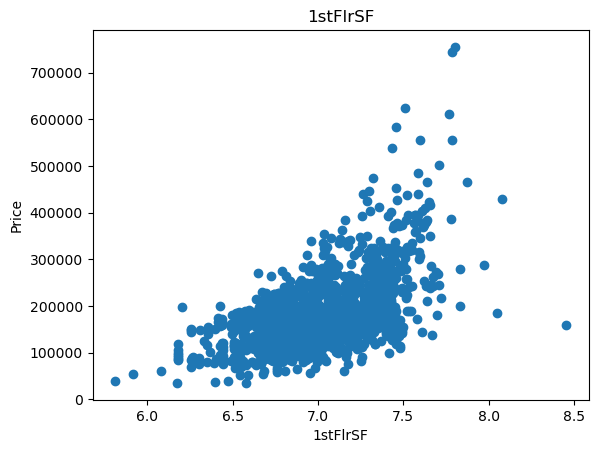

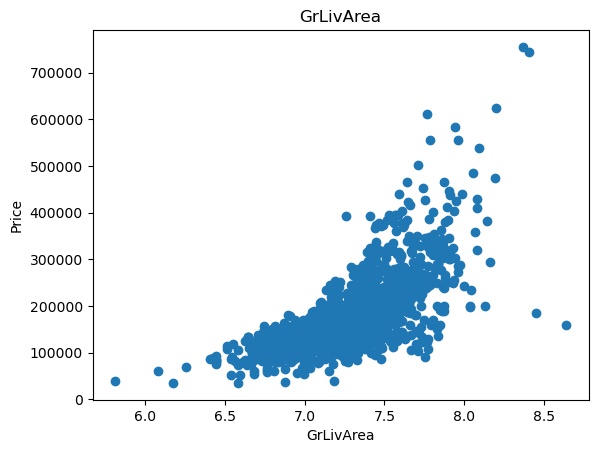

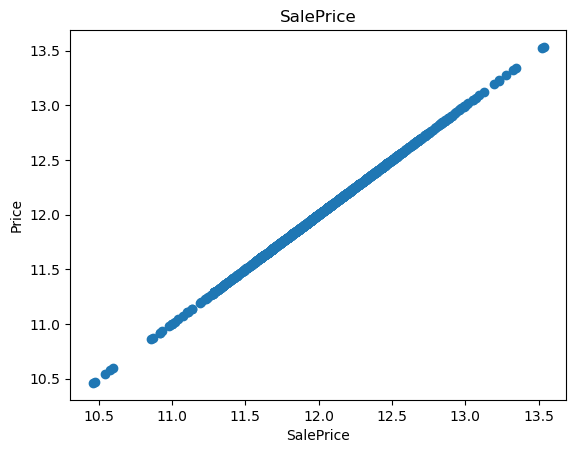

In [45]:
for i in con_num:
    
        copy=data.copy()
        copy[i]=np.log(copy[i])
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
        plt.scatter(copy[i],copy['SalePrice'])
        plt.show()